In [96]:
# using Pkg;

In [1]:
using LsqFit,DelimitedFiles,Statistics
using PyCall,PyPlot
@pyimport matplotlib.animation as anim
# using HDF5

In [12]:
include("../src/sim_times.jl") # has regress.jl
# jd1=2.445005e6 ; sigma=5.0 ; nyear=20.0
obs="fromEV"
# sim_obs_and_find_times(jd1,sigma,nyear,"fromEV")
# tt1,tt2=sim_times(jd1,nyear,"fromEV")
# pva_venus,pva_earth=plot_orbits(2,obs="fromEV",return_pva=true)
  jd1=2.445005e6 ; sigma=30 ;jdsize=1000;nyear=15
  jd2 = nyear*365.25 + jd1
  theta_sun=range(0, stop=2pi, length=100)
  xsun = CGS.RSUN/CGS.AU * cos.(theta_sun)
  ysun = CGS.RSUN/CGS.AU * sin.(theta_sun)
  t0 = range(jd1,stop=jd2-1,length = jdsize)
  pva_sun = zeros(6, jdsize)
  pva_mer = zeros(6, jdsize)
  pva_venus = zeros(6, jdsize)
  pva_earth = zeros(6, jdsize)
  pva_mars = zeros(6, jdsize)
  pva_jup = zeros(6, jdsize)
  pva_sat = zeros(6, jdsize)
  pva_emb = zeros(6, jdsize)
  pva_moon = zeros(6, jdsize)
  P_err=1.0
  for i=1:jdsize
    pva_sun[1:6,i] = compute(eph,t0[i],0.0,10,10,options)./AU
    pva_mer[1:6,i] = compute(eph,t0[i],0.0,1,10,options)./AU
    pva_venus[1:6,i] = compute(eph,t0[i],0.0,2,10,options)./AU
    pva_mars[1:6,i] = compute(eph,t0[i],0.0,4,10,options)./AU
    pva_jup[1:6,i] = compute(eph,t0[i],0.0,5,10,options)./AU
    pva_sat[1:6,i] = compute(eph,t0[i],0.0,6,10,options)./AU
    if obs=="fromEMB"
      pva_emb[1:6,i] = compute(eph,t0[i],0.0,3,10,options) ./AU
    else
      pva_moon[1:6,i] = compute(eph,t0[i],0.0,301,10,options)./AU
      pva_earth[1:6,i] = compute(eph,t0[i],0.0,399,10,options)./AU
    end
  end

n_obs=zeros(3)
  if obs=="fromEMB"
  n_obs=calc_obs_loc(pva_venus[1:3],pva_venus[4:6],pva_emb[1:3],pva_emb[4:6])
  else 
  n_obs=calc_obs_loc(pva_venus[1:3],pva_venus[4:6],pva_earth[1:3],pva_earth[4:6])
  end
  # body,trans,tt,sigtt,tt0=sim_obs_and_find_times(jd1,sigma,nyear,obs)
  # tt1,tt2=sim_times(jd1,nyear,obs)

  trans_pva_mer=zeros(6,jdsize)
  trans_pva_venus = zeros(6, jdsize)
  trans_pva_earth = zeros(6, jdsize)
  trans_pva_mars = zeros(6, jdsize)
  trans_pva_jup = zeros(6, jdsize)
  trans_pva_sat = zeros(6, jdsize)
  trans_pva_emb = zeros(6, jdsize)
  trans_pva_moon = zeros(6, jdsize)
  truep1,truep2,truep3,truep4,truep5=224.7007992,365.2564,686.9795859,4332.82012875,10755.5
  tt1,nt1 = transit_times(1,eph,t0,87.96,P_err,n_obs,10) #mercury
  tt2,nt2 = transit_times(2,eph,t0,truep1,P_err,n_obs,10) #venus
  tt4,nt4 = transit_times(4,eph,t0,truep3,2.0,n_obs,10) #mars
  tt5,nt5 = transit_times(5,eph,t0,truep4,3.0,n_obs,10) #jupiter
  tt6,nt6 = transit_times(6,eph,t0,truep5,3.0,n_obs,10) # saturn
  if obs=="fromEMB"
    tt3,nt3 = transit_times(3,eph,t0,truep2,P_err,n_obs,10)
  else
    tt3,nt3 = transit_times(399,eph,t0,truep2,P_err,n_obs,10)
  end
  nt1 = length(tt2) #sum(body .== 1.0)
  nt2 = length(tt3) #sum(body .== 2.0)
  tt=[tt2;tt3]
  # Find locations at the transit times of V + E
  for i=1:length(tt)
    trans_pva_venus[1:6,i] = compute(eph,tt[i],0.0,2,10,options)./AU
    # trans_pva_mars[1:6,i] = compute(eph,tt[i],0.0,4,10,options)./AU
    # trans_pva_jup[1:6,i] = compute(eph,tt[i],0.0,5,10,options)./AU
    # trans_pva_sat[1:6,i] = compute(eph,tt[i],0.0,6,10,options)./AU
    if obs=="fromEMB"
      trans_pva_emb[1:6,i] = compute(eph,tt[i],0.0,3,10,options) ./AU
    else
      trans_pva_moon = compute(eph,tt[i],0.0,301,10,options)./AU
      trans_pva_earth[1:6,i] = compute(eph,tt[i],0.0,399,10,options)./AU
    end

  end

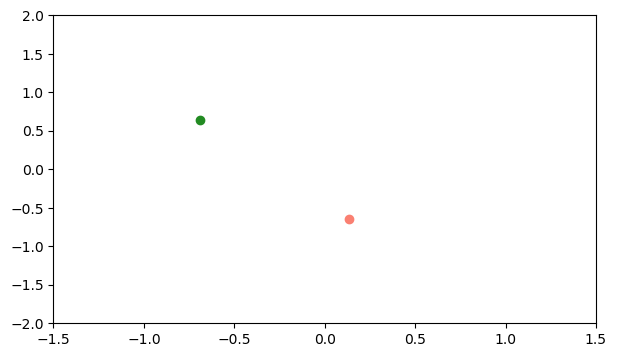

In [70]:
xjup=[pva_jup[1,i] for i=1:jdsize if i%10==0]
yjup=[pva_jup[2,i] for i=1:jdsize if i%10==0]
# zjup=[pva_jup[3,i] for i=1:jdsize if i%10==0]
xvenus=[pva_venus[1,i] for i=1:jdsize if i%5==0]
yvenus=[pva_venus[2,i] for i=1:jdsize if i%5==0]
# zvenus=[pva_venus[3,i] for i=1:jdsize if i%5==0]
xearth=[pva_earth[1,i] for i=1:jdsize if i%5==0]
yearth=[pva_earth[2,i] for i=1:jdsize if i%5==0]
# zearth=[pva_earth[3,i] for i=1:jdsize if i%5==0]
xmoon=[pva_moon[1,i] for i=1:jdsize if i%5==0]
ymoon=[pva_moon[2,i] for i=1:jdsize if i%5==0]
# need to trim positions
bin_size=200
# nframes=jdsize/bin_size
fig=figure(figsize=(7,4));  
ax=fig.add_subplot(111);ax.set_ylim(-2,2);ax.set_xlim(-1.5,1.5)

x=[1:bin_size;]
function init_orb()
ax.plot(xearth,yearth,color="forestgreen")
end                                                                                               
# PyPlot.Axes3D(fig)            ; PyPlot.xlim(-5.5,5);PyPlot.ylim(-5,5)  ;PyPlot.zlim(-0.5,0.5)      
#     PyPlot.xlabel("x [au]");PyPlot.ylabel("y [au]");PyPlot.zlabel("z [au]")
# PyPlot.plot3D([0,n_obs[1]*2],[0,n_obs[2]*2],[0,n_obs[3]*2],"k--",linewidth=2,alpha=0.5) 
                                                                                                    
ax.scatter(xsun,ysun,color="yellow")
#   ax.fill(xsun.*5,ysun.*5,color="yellow")
#   ax.fill(xsun.*30,ysun.*30,color="yellow")
# i=0,1,...,frames-1
function update_pos(i) 
    ax.clear();ax.set_ylim(-2,2);ax.set_xlim(-1.5,1.5)
    ax.plot(xmoon[i],ymoon[i],color="purple")                                               
    ax.scatter(xearth[i],yearth[i],color="forestgreen")
    ax.scatter(xvenus[i],yvenus[i],color="salmon")
                                                                                                                                    
#     line1[1].set_xdata(new_xearth[i])
#     line1[1].set_ydata(new_yearth[i])
    return  lines
end
test=anim.FuncAnimation(fig,update_pos,frames=x,init_func=init_orb,
    blit=true,interval=30)
anim.FuncAnimation.save(test,"test1.mp4")

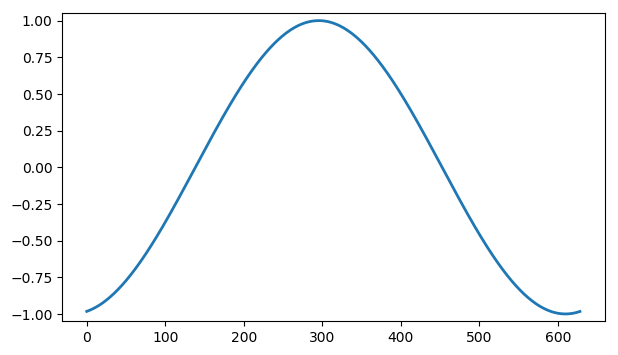

In [224]:
fig=figure(figsize=(7,4))
ax=fig.add_subplot(111)
ax.set_ylim(-1.05,1.05)
x = [0:0.01:2pi;]

function animate(i)
    clf()
    ylim(-1.05,1.05)
    plot(sin.(x .+ i/10))

end

function init()
    ylim(-1.05,1.05)
    plot(x,sin.(x))
end

myanim = anim.FuncAnimation(fig, animate, init_func=init,frames=50, 
    interval=30, blit=true,repeat=true)
# makes nice animation with static axes
# anim.FuncAnimation.save(myanim, "test3.mp4")

In [ ]:
  ## Find position of Moon w.r.t. Earth when Earth transit occurs
function plot_orbits(dimension::Int;obs::String,nyear::Real=20,return_pva::Bool=false)
  fig,(ax2,ax1)=subplots(1,2,figsize=(8,4))#,dpi=150)
  # title(string("Location over ",nyear,"yrs"))
    #fig,ax2=subplots(1,1,figsize=(8,6))
     #ax1=fig.add_axes([0.6,0.6,0.35,0.35])
  ax1.fill(xsun.*5,ysun.*5,color="yellow")
  ax2.fill(xsun.*30,ysun.*30,color="yellow")
  ax1.plot(xsun,ysun,color="yellow")
  ax2.plot(xsun,ysun,color="yellow")
  ax1.plot(pva_mer[1,:],pva_mer[2,:],color="silver",linewidth=2,alpha=0.5)
  ax1.plot(pva_venus[1,:],pva_venus[2,:],color="salmon",linewidth=2,alpha=0.5)
  ax1.plot(pva_mars[1,:],pva_mars[2,:],color="orange",linewidth=2,alpha=0.5)
  ax2.plot(pva_venus[1,:],pva_venus[2,:],color="salmon",linewidth=2,alpha=0.5)
  ax2.plot(pva_mer[1,:],pva_mer[2,:],color="silver",linewidth=2,alpha=0.5)
  ax2.plot(pva_mars[1,:],pva_mars[2,:],color="orange",linewidth=2,alpha=0.5)
  ax2.plot(pva_jup[1,:],pva_jup[2,:],color="firebrick",linewidth=2,alpha=0.5)
  ax2.plot(pva_sat[1,:],pva_sat[2,:],color="tan",linewidth=2,alpha=0.5)
  # plot(pva_venus[1,:],pva_venus[2,:],color="salmon",linewidth=1,alpha=0.5)

  # for i=1:nt1
  # ax1.scatter(trans_pva_venus[1,i],trans_pva_venus[2,i],marker="v",color="salmon")
  # end
  ax1.scatter(trans_pva_venus[1,1:nt1],trans_pva_venus[2,1:nt1],marker="v",color="salmon",label="Venus")
    if obs=="fromEMB"
      ax2.plot(pva_emb[1,:],pva_emb[2,:],color="forestgreen",linewidth=2,alpha=0.5)
      n_obs=calc_obs_loc(trans_pva_venus[1:3],trans_pva_venus[4:6],trans_pva_emb[1:3],trans_pva_emb[4:6])
      ax1.plot(pva_emb[1,:],pva_emb[2,:],color="forestgreen",linewidth=2,alpha=0.5)
      ax1.scatter(trans_pva_emb[1,nt1+1:nt1+nt2],trans_pva_emb[2,nt1+1:nt1+nt2],marker=".",color="forestgreen",label="EMB")
    # for i=1:nt2
    # ax1.scatter(trans_pva_emb[1,nt1+i],trans_pva_emb[2,nt1+i],marker=".",color="forestgreen")
    # end
    else
    ax2.plot(pva_earth[1,:],pva_earth[2,:],color="forestgreen",linewidth=2,alpha=0.5)
    n_obs=calc_obs_loc(trans_pva_venus[1:3],trans_pva_venus[4:6],trans_pva_earth[1:3],trans_pva_earth[4:6])
    ax1.plot(pva_earth[1,:],pva_earth[2,:],color="forestgreen",linewidth=2,alpha=0.5)
    ax1.scatter(trans_pva_earth[1,nt1+1:nt1+nt2],trans_pva_earth[2,nt1+1:nt1+nt2],marker=".",color="forestgreen",label="Earth")
    for i=1:nt2
    ax1.scatter(trans_pva_earth[1,nt1+i],trans_pva_earth[2,nt1+i],marker=".",color="forestgreen")
    end
    end
  # arrow(0.0,0.0,n_obs[1],n_obs[2],facecolor="black")
  ax1.plot([0,n_obs[1]*1.1],[0,n_obs[2]*1.1],"k--",linewidth=2,alpha=0.5)
  ax1.annotate("Line of sight",xy=[n_obs[1];n_obs[2]], xytext=[n_obs[1]+0.05;n_obs[2]],xycoords="data",fontsize="medium") 
 ### ax1.grid(linestyle="--",alpha=0.4)
  ax2.set_xlabel("x [au]",fontsize="large")
  ax2.set_ylabel("y [au]",fontsize="large")
  ax1.set_ylim(-1.1,1.1)
    ax1.set_xlim(-1.1,1.1)
    ax2.set_xlim(-10,10)
    ax2.set_ylim(-10,10)
    ax1.legend(title="Mid-Transit",fontsize="large",title_fontsize="large",markerscale=1.5,loc="upper left")
    #ax1.tick_params(which="both",direction="in",top=true,bottom=true)
  ax1.set_xlabel("x [au]",fontsize="large")
  # fill(xsun,ysun,color="yellow")
  # plot(xsun,ysun,color="black")
  # plot(pva_venus[1,:],pva_venus[2,:],color="orange",linewidth=1,alpha=0.5)
  # plot(pva_emb[1,:],pva_emb[2,:],color="forestgreen",linewidth=1,alpha=0.5)
  # scatter(trans_pva_venus[1,1:nt1],trans_pva_venus[2,1:nt1],marker=".",color="orange")
  # scatter(trans_pva_emb[1,nt1+1:nt1+nt2],trans_pva_emb[2,nt1+1:nt1+nt2],marker=".",color="forestgreen")
  # plot([0,n_obs[1]*1.2],[0,n_obs[2]*1.2],"k--",linewidth=1)
  # # arrow(0.0,0.0,n_obs[1],n_obs[2],facecolor="black")
  # # ("to observer",xy=[n_obs[1];n_obs[2]], xytext=[n_obs[1]+0.05;n_obs[2]],xycoords="data") 
  # xlabel("x [au]",fontsize=20)
  # ylabel("y [au]",fontsize=20)
  tight_layout()
  @show

(nt1, nt2) = (32, 20)
Returns TT calculated from Ephem.


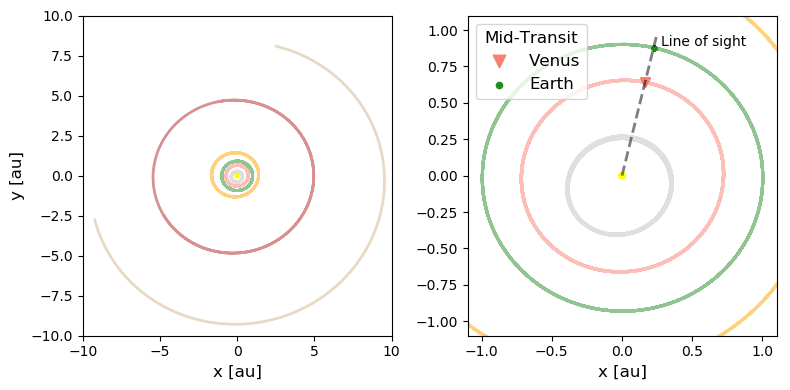

([2.445080396756433e6, 2.445168365959506e6, 2.4452563352796277e6, 2.445344305495924e6, 2.4454322748798355e6, 2.4455202441306966e6, 2.4456082132813963e6, 2.445696182893685e6, 2.4457841528173233e6, 2.445872122028862e6  …  2.451502155542022e6, 2.4515901246849536e6, 2.4516780937834685e6, 2.4517660634249435e6, 2.451854033452632e6, 2.4519420027432046e6, 2.4520299717037017e6, 2.452117941047968e6, 2.4522059105505855e6, 2.4522938801836157e6], [2.4451881196831632e6, 2.445412820912534e6, 2.445637524511117e6, 2.4458622236094633e6, 2.446086923076626e6, 2.446311627664524e6, 2.4465363290415625e6, 2.4467610288782488e6, 2.446985726921135e6, 2.4472104268492777e6  …  2.450131536806264e6, 2.4503562424627403e6, 2.450580942693745e6, 2.4508056412666687e6, 2.4510303412094796e6, 2.4512550423061787e6, 2.4514797456594566e6, 2.4517044445788646e6, 2.4519291435101037e6, 2.4521538477004906e6], [2.445312476506799e6, 2.4456777299249074e6, 2.4460429913212946e6, 2.446408247297054e6, 2.4467735022077207e6, 2.4471387618731

In [3]:
ttvs=plot_orbits(2,obs="fromEV")

In [93]:
# Do linear regression on computed transit times to estimate ephemeris:
function est_eph(tt)
    x = Array{Float64}(undef,2, length(tt))
    x[1,:]=ones(length(tt)) 
    x[2,:]=collect(range(0,step=1,length(tt)-1))
    t0,per=transpose(x)\tt
    println("Estimated ephemerides.",'\n',
        "First Mid-transit time:    ", t0," JED",'\n',
        "Period (in days):          ", per)
    return t0,per
end
using LsqFit,Optim
function subtract_sine(time1,time2,ttv1,ttv2,P_1,P_2,j) 
# Subtract sine curve from TTVs:
	# Let x=p/P_1 - q/P_2 ; 
    # While a and b are coefficients  
    # functions of the orbital elements of the planets per equations 3 and 4 of DA15:
	# Sine model: 
	sin_model(t,a,b,x)=a.*sin.(t .* 2pi ./x) + b.*cos.(t.*2pi ./x)
    # Super period: (j+1)/j ~ P_2/P_1 -> j=3.89 -> 3<j<4
	P_ttv=1/abs((j/P_1)-((j+1)/P_2))
    function opt_model(tt,ttv)
        function sin_fit(vars)
            a,b,x=vars
            return sum((ttv_i.-sin_model.(tt_i,a,b,x)).^2) # for transit times, tt
        end
        tt_i=copy(tt); ttv_i=copy(ttv)
        # initial conditions: 
        # Semi-amplitude: (not peak A_ttv)
        a_init=0.5*(maximum(ttv_i)-minimum(ttv_i))
#         a_init=maximum(ttv_i)-minimum(ttv_i)
        b_init=0.0
        vars0=[a_init,b_init,P_ttv]
        res0=optimize(sin_fit,vars0) # random phase
#         @show res0.minimum
        chisq=Inf
        # Optimize over phases
        for i=1:16
        phase=i * pi/8
        res=optimize(sin_fit,[a_init*cos(phase),a_init*sin(phase),P_ttv])
        if res.minimum < chisq
            # Overwrite values for random phase 
            chisq=res.minimum
            res0=res
        end
        end
        @show res0
        return res0.minimizer,chisq
    end
    res1,chisq1=opt_model(time1,ttv1)
    res2,chisq2=opt_model(time2,ttv2)
    ttv2_sin=sin_model(time2,res2[1],res2[2],res2[3])
    ttv1_sin=sin_model(time1,res1[1],res1[2],res1[3])
    ttv1_chop=ttv1 .- ttv1_sin ; ttv2_chop=ttv2 .- ttv2_sin
#         chop=ttv1.-ttv_sin
	return ttv1_chop,ttv2_chop,res1,res2#vals,chop
end

subtract_sine (generic function with 2 methods)

In [92]:
ttv1_chop,ttv2_chop,res1,res2=subtract_sine(t1,t2,ttv1,ttv2,per1,per2,2)

res0.minimizer = [0.00042863750351603984, 0.00031695050137625923, 1512.6735063559802]
res0.minimizer = [-0.0003020125743701082, -0.00158602507155475, 990.9454853805621]


([-0.0017062260384828384, -0.0009798405283394465, 0.00169294812461554, -0.0004559429058176133, -0.002195823465864781, 0.0015543178940209926, 0.0024929688737501867, 0.001997355315918468, -0.0005651506630214684, -0.0016735533148823118  …  -0.0019658922123018067, 0.002482593992784846, 0.0014670170952635754, -0.0008841267996491601, -0.0014429006484625864, -0.0006674147962635039, 0.002156863545582994, 0.00011957176125544606, -0.0022071979759331417, 0.0007942287058865545], [-0.0007032392872224379, -0.0009868933176650253, 0.0012923095149751686, 0.0016865857987514931, 0.0016362138582454349, 0.001963528070188133, -0.00031527359182620786, -0.0004661720589561958, 0.0013460156055321915, -0.0012553610450656196, -0.003210049365851633, -0.0042821930089609345, -0.0033530335793960113, -4.116036987858668e-5, 0.0005986416513524238, 0.0013598132864452266, 0.0028309748217136424, 0.0008155910351452329, -0.00012065240058252956, 7.647993708050451e-5], [0.00042863750351603984, 0.00031695050137625923, 1512.6735

In [5]:
t02,per2=est_eph(ttvs[3]);t01,per1=est_eph(ttvs[2])

Estimated ephemerides.
First Mid-transit time:    2.4453124760752656e6 JED
Period (in days):          365.2564501117535
Estimated ephemerides.
First Mid-transit time:    2.4451881216139584e6 JED
Period (in days):          224.7008006021744


(2.4451881216139584e6, 224.7008006021744)

In [51]:
nt2=length(ttvs[3]);ntrans2=range(0,stop=nt2-1,length=nt2)
t2  = collect(t02 .+ per2.* ntrans2)
nt1=length(ttvs[2]);ntrans1=range(0,stop=nt1-1,length=nt1)
t1  = collect(t01 .+ per1.* ntrans1)
ttv1=ttvs[2].-t1 ; ttv2=ttvs[3].-t2;

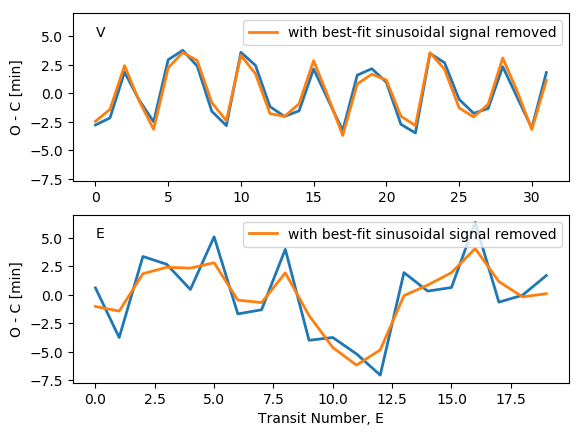

PyObject <matplotlib.legend.Legend object at 0x7fe74a09c0f0>

In [99]:
ax1=subplot(211)
plot(ntrans1,(ttvs[2].-t1).*24*60)
text(0,5,"V")
plot(ttv1_chop.*24*60,label="with best-fit sinusoidal signal removed")
ylabel("O - C [min]"); legend()
subplot(212,sharey=ax1)
text(0,5,"E")
plot(ntrans2,(ttvs[3].-t2).*24*60)
plot(ttv2_chop.*24*60,label="with best-fit sinusoidal signal removed")
xlabel("Transit Number, E");ylabel("O - C [min]");legend()

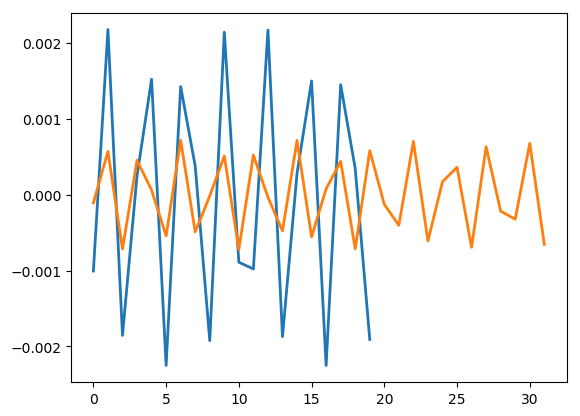

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe747d4c9e8>

In [82]:
plot(ttv2_chop.-ttv2);plot(ttv1_chop.-ttv1)

In [39]:
include("MCMC.jl")
mc_vals(30,30,"p4",1)

(BIC, chisq, reduced_chisq) = (-1138.12, 77.5198, 1.3139)
Retrieved values.


M_p[M⊕]= [0.8298487086853478, 1.001880504927621, 0.09302893613133137, 284.3456468583244]
eccen. =[0.0017433092149239371, 0.013206760718212062, 0.10370758167113427, 0.04133565115751076] +/- [0.004113187964522591, 0.00393837744633522, 0.07796624943650936, 0.020548950152103358]


([2.492650360712349e-6, 224.7007775666646, 3503.765395998632, -0.001305401957576211, 0.0011554448268934828, 3.009389272840835e-6, 365.2564552300508, 3624.402149135175, 0.012589909548388411, 0.003989073354992048  …  687.3728662037332, 401.5042296936124, -0.05836341861859702, -0.08572615623731993, 0.0008541005990492337, 4328.827748851826, 389.4250032394223, 0.009314965542764874, -0.04027241578987439, 0.0001887758023208699], [1.7489269802494448e-7 4.657659701479133e-6 … 0.015516183840716541 9.6490617555836e-5; 1.7651922833940377e-7 4.7055721097422065e-6 … 0.013798415013583532 8.466183663908202e-5])

In [38]:
include("MCMC.jl")
mc_vals(30,30,"p3",1)

(BIC, chisq, reduced_chisq) = (-1130.33, 74.1741, 1.15897)
Retrieved values.


M_p[M⊕]= [0.8403816314244364, 1.006998044719139, 236.56314071366842]
eccen. =[0.001214980387940941, 0.013528705656051002, 0.0351908693140695] +/- [0.004856357586641647, 0.0033819012264502315, 0.019723604076691582]


([2.5242885296823747e-6, 224.70078010994513, 3503.7653535329523, -0.0009373792140168512, 0.0007729796583418414, 3.0247610355173064e-6, 365.25645400475594, 3624.402176868167, 0.013142206350227103, 0.003210652422190353, 0.0007105743394664431, 4206.060291406852, 677.8664987814659, 0.0022043896332798584, -0.0351217589170105, 0.0002854163300018734], [1.8751395568333516e-7 4.625048603656978e-6 … 0.01960331896441994 6.523282624000442e-5; 1.9258632364085296e-7 4.621764048806654e-6 … 0.017388558814346883 6.517661142588753e-5])

In [40]:
mc_vals(30,30,"p2",1)

(BIC, chisq, reduced_chisq) = (-1013.54, 73.4445, 1.06441)
Retrieved values.
M_p[M⊕]= [0.8357048419635491, 1.0024799823494528]
eccen. =[0.004687958409100521, 0.009313838182782344] +/- [0.010716773043446343, 0.007003701441799304]


([2.510240666722963e-6, 224.70077800791606, 3503.7654441237464, -0.004680197412504923, 0.0002696409194438188, 3.011189947585675e-6, 365.2564332690951, 3624.4025547960223, 0.00916352890021216, 0.0016665292646787855, 0.0009447253675013874], [4.0977235608726723e-7 9.990922990255058e-6 … 0.008619990119198333 8.5304242898923e-5; 4.5368305457302556e-7 1.0309949743714242e-5 … 0.012619895322150836 9.653104237452833e-5])

In [28]:
mc_vals(10,30,"p4",1)

(BIC, chisq, reduced_chisq) = (-1231.11, 86.0568, 1.45859)
Retrieved values.
M_p[M⊕]= [0.7659014982485786, 1.0104727882573261, 0.07833359933836251, 360.0704983484024]
eccen. =[0.0020575710590222908, 0.013530225281792933, 0.14420284597161603, 0.04723351254576815] +/- [0.003912518959672761, 0.0012895415990861183, 0.10993258827051972, 0.03195334896357465]


([2.300569520562244e-6, 224.7007739249592, 3503.765499136624, 0.0008061665788416592, -0.0018930647400669754, 3.035198264187055e-6, 365.25645837609795, 3624.4022105292856, 0.013475489343109565, 0.0012158055518088386  …  689.4181804471522, 368.4393285277529, -0.05941519910759268, -0.13139366385529683, 0.001081558419259209, 4341.071604720132, 378.8546375781889, 0.03350659964139993, -0.033291327517570926, 0.00018775760693922217], [9.296389626241007e-8 2.434905781001362e-6 … 0.005673764225144463 2.2771366750692332e-5; 9.519338219612654e-8 2.4232982127614378e-6 … 0.005324942873642113 2.6234117904071224e-5])

In [46]:
Per=[224.70,365.25,686.98,4332.82,10755.5]
Per[2]/Per[1],(Per[1]/Per[2])^(2/3)#/Per[1]

(1.6255006675567425, 0.7233390285130801)

In [24]:
# collect(2.4332825e6:3.655155155155155:2.436934e6)
[tt2[1],tt3[1],tt4[1],tt5[1],tt6[1]].-tref

5-element Vector{Float64}:
  3503.764418800827
  3624.4053690279834
  3818.720483701676
  4666.546965984162
 11647.611103258561

In [108]:
# Real SS data
SS_params=[2.5422162292092204e-6
  224.70078014619864
 3503.765349062694
  -0.003 
    -0.006 
    3.0256056455411807e-6
  365.2564540136157
 3624.4021734758985
    0.011 
    0.012 
0.3227e-6
  686.980     
  383.823    
    0.0403  
   0.0268 
0.0007712378609020167
 4210.1287973187655
  603.9841005839645
   0.0131   
   0.0925
2.8420e-4
	10755.5
	892.111
	-0.051
	0.014]


25-element Vector{Float64}:
     2.5422162292092204e-6
   224.70078014619864
  3503.765349062694
    -0.003
    -0.006
     3.0256056455411807e-6
   365.2564540136157
  3624.4021734758985
     0.011
     0.012
     3.227e-7
   686.98
   383.823
     0.0403
     0.0268
     0.0007712378609020167
  4210.1287973187655
   603.9841005839645
     0.0131
     0.0925
     0.0002842
 10755.5
   892.111
    -0.051
     0.014

In [ ]:
# Radius ratio:
r = [0.0087 0.00917]
# Ratio of semi-major axis to stellar radius:
# aonr = 19.94
# Orbital period [d]:
period = 4.28746668
# Impact parameter:
# b0 = 0.374
# Transit duration [hr] (this is time between first and fourth contact):
T = 1.5693

# Check that these agree.  Compute velocity:
v = 2*pi*aonr/period
# Transit duration [convert to hr], approximate:
T0 = 2*sqrt((1+r)^2-b0^2)/v*24

In [149]:
# transform from positions/velocities to orbital elements
function transform_eph(pos1,vel1,mp,P)
#        @show pos1,vel1
    pos=pos1.*10^5
    vel=vel1.*10^5 ./ (3600 * 24)
    MSUN = 1.98892e33
    MEARTH = 5.9742e27.*mp
    GRAV = 6.67384e-8 #cgs

  X,Y,Z= pos[1], pos[2], pos[3]
  X_dot,Y_dot,Z_dot= vel[1], vel[2], vel[3]
  R=norm(pos); V=norm(vel)
#   V=sqrt(X_dot^2 + Y_dot^2 + Z_dot^2)
#   h_bar=[Y*Z_dot - Z*Y_dot, Z*X_dot - X*Z_dot, X*Y_dot - Y*X_dot]
    h_vec=cross(pos,vel)
    hs=dot(h_vec,h_vec)
#   h=norm(h_bar)
    h=sqrt(hs)
    R_dot=sqrt(V^2 - (h^2 / R^2)) # +/-
    a=1/((2/R) - (V^2 / (GRAV * (MEARTH+MSUN))))
    e=sqrt(1- (h^2 / (GRAV * (MEARTH+MSUN)*a)))
    I=acos(h_vec[3]/h)
    E=acos(((R/a) - 1)/e)
    f=asin(a*R_dot*(1 - e^2)/(h*e))
    Eanom=2*atan(sqrt((1-e)/(1+e)) * tan(f/2))
    Tp=(E- e*sin(E))*P/ 2pi
    
#         t=time.*(3600*24)
#     tau= t - ((E - e*sin(E))/sqrt(GRAV*(MEARTH+MSUN)*a^(-3)))
  return E,Eanom,Tp
end 
one,two,three=transform_eph(pva_V[1:3],pva_V[4:6],0.815,224.70)
#   @show hbar1norm()


(2.1745345545873436, 0.967058098993564, 77.56885369335953)

In [201]:
# include("../ttv_ss/misc.jl")
true_vals=[ 0.815.*CGS.MEARTH/CGS.MSUN,1.0.*CGS.MEARTH/CGS.MSUN,0.1074.*CGS.MEARTH/CGS.MSUN,317.8.*CGS.MEARTH/CGS.MSUN,#95.07.*CGS.MEARTH/CGS.MSUN,
        224.7007992,365.2564,686.9795859,4332.82012875,#10755.5,
        3503.7655,3624.4022,150.0,100.0,#0.0,
        calc_evec1(0.00677323,131.53298),calc_evec1(0.01671022,102.94719),calc_evec1(0.09341233,336.04084),calc_evec1(0.04839266,14.75385),#calc_evec1(0.05415060,92.43194),
        calc_evec2(0.00677323,131.53298),calc_evec2(0.01671022,102.94719),calc_evec2(0.09341233,336.04084),calc_evec2(0.04839266,14.75385)]#,calc_evec2(0.05415060,92.43194)]
nplanet=4
ss_vals=reshape(true_vals,nplanet,5)
reshape(transpose(ss_vals),20,1)


20×1 reshape(transpose(::Matrix{Float64}), 20, 1) with eltype Float64:
    2.448048689741166e-6
  224.7007992
 3503.7655
   -0.002914926506800378
   -0.006113906123981014
    3.003740723608793e-6
  365.2564
 3624.4022
    0.01146771319607987
    0.012154135366238753
    3.2260175371558434e-7
  686.9795859
  150.0
    0.013086282283637845
    0.0924911488306954
    0.0009545888019628744
 4332.82012875
  100.0
    0.040326747776546754
    0.026750756169543723

(i, j) = (1, 2)
param = [2.448048689741166e-6, 224.7007992, 3503.7655, -0.002914926506800378, -0.006113906123981014, 3.003740723608793e-6, 1.0000030037407237, 2.0000030037407237, 3.0000030037407237, 4.000003003740724, 5.000003003740724, 6.000003003740724, 7.000003003740724, 8.000003003740723, 9.000003003740723]
(i, j) = (1, 3)
param = [2.448048689741166e-6, 224.7007992, 3503.7655, -0.002914926506800378, -0.006113906123981014, 3.2260175371558434e-7, 1.0000003226017538, 2.0000003226017538, 3.0000003226017538, 4.000000322601753, 5.000000322601753, 6.000000322601753, 7.000000322601753, 8.000000322601753, 9.000000322601753, 10.000000322601753, 11.000000322601753, 12.000000322601753, 13.000000322601753, 14.000000322601753]
(i, j) = (1, 4)
param = [2.448048689741166e-6, 224.7007992, 3503.7655, -0.002914926506800378, -0.006113906123981014, 0.0009545888019628744, 1.0009545888019629, 2.000954588801963, 3.000954588801963, 4.000954588801963, 5.000954588801963, 6.000954588801963, 7.000954588801963,

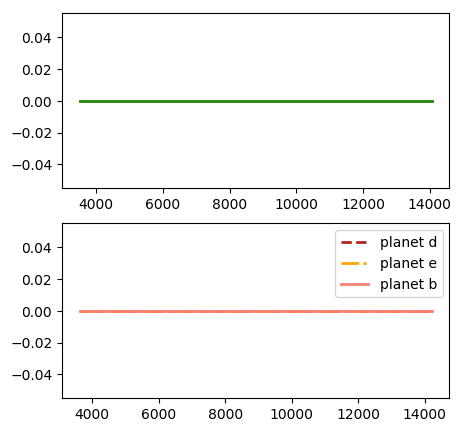

PyObject <matplotlib.legend.Legend object at 0x7fc0d4379f98>

In [218]:
# include("../ttv_ss/decompose_ttvs.jl")
function decompose_ttvs(nplanet,ntrans,params)
	jmax = 5
	pair_ttvs = zeros(nplanet,nplanet,maximum(ntrans))
	for i=1:nplanet-1,j=i+1:nplanet
		param = [params[(i-1)*5+1:i*5] ; params[(j-1)*5+1]:j*5]
        @show i,j param
#         ivec=[i,i+nplanet,i+2*nplanet,i+3*nplanet,i+4*nplanet]
#                 ivec=[i,i+nplanet,i+2*nplanet,i+3*nplanet,i+4*nplanet]

# 		ttv = TTVFaster.ttv_nplanet(2,jmax,[ntrans[i];ntrans[j]],param)
# # 		ttv = TTVFaster.ttv_nplanet(nplanet,jmax,[ntrans[i];ntrans[j]],[params[(i-1)*5+1:i*5]; params[(j-1)*5+1:j*5]])
# 		pair_ttvs[i,j,1:ntrans[i]] = ttv[1,1:ntrans[i]] #planet i wrt planet j
# 		pair_ttvs[j,i,1:ntrans[j]] = ttv[2,1:ntrans[j]] #planet j wrt planet i
	end
  return pair_ttvs
end

p4_ttvs=decompose_ttvs(nplanet,[48,30,2,2],reshape(transpose(ss_vals),20,1)) .* (24 * 60)
n1,n2=[48,30]
t1  = collect(3503.77 .+ 224.701 .* range(0,stop=n1-1,length=n1)) 
t2  = collect(3624.4 .+ 365.256 .* range(0,stop=n2-1,length=n2))
p1_ttvs=p4_ttvs[1,4,1:n1]+p4_ttvs[1,3,1:n1]+p4_ttvs[1,2,1:n1]
p2_ttvs=p4_ttvs[2,4,1:n2]+p4_ttvs[2,3,1:n2]+p4_ttvs[2,1,1:n2];
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(211)
# ax2.plot(t1,p4_ttvs[1,5,1:n1],color="tan",label="planet f")
ax.plot(t1,p4_ttvs[1,4,1:n1],color="firebrick",label="planet d")
ax.plot(t1,p4_ttvs[1,3,1:n1],color="orange",label="planet e")
ax.plot(t1,p4_ttvs[1,2,1:n1],color="forestgreen",label="planet c")
# ax2.legend()
ax2=fig.add_subplot(212)
# ax2.plot(t2,p4_ttvs[2,5,1:n2],color="tan",label="planet f")
ax2.plot(t2,p4_ttvs[2,4,1:n2],color="firebrick",label="planet d",linestyle="--")
ax2.plot(t2,p4_ttvs[2,3,1:n2],color="orange",label="planet e",linestyle="-.")
ax2.plot(t2,p4_ttvs[2,1,1:n2],color="salmon",label="planet b")
ax2.legend()

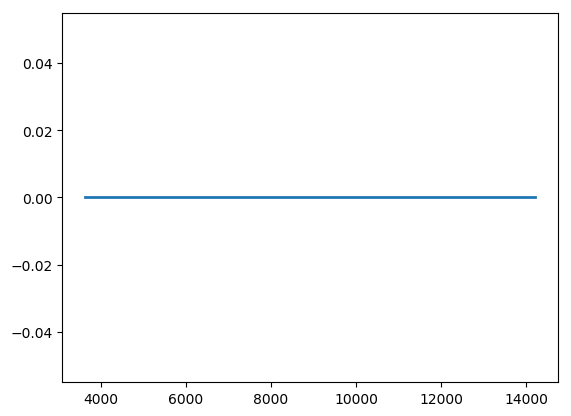

4×4×48 Array{Float64, 3}:
[:, :, 1] =
 0.0          1.64953e-5  1.73341e-6  0.0
 0.000839927  0.0         0.0         0.0
 5.95552e-5   0.0         0.0         0.0
 0.0          0.0         0.0         0.0

[:, :, 2] =
  0.0         1.64953e-5  1.73341e-6  0.0
 -0.00201632  0.0         0.0         0.0
  5.9302e-5   0.0         0.0         0.0
  0.0         0.0         0.0         0.0

[:, :, 3] =
 0.0         1.64953e-5  1.73341e-6  0.0
 0.00281051  0.0         0.0         0.0
 0.0         0.0         0.0         0.0
 0.0         0.0         0.0         0.0

...

[:, :, 46] =
 0.0  1.64953e-5  1.73342e-6  0.0
 0.0  0.0         0.0         0.0
 0.0  0.0         0.0         0.0
 0.0  0.0         0.0         0.0

[:, :, 47] =
 0.0  1.64953e-5  1.73342e-6  0.0
 0.0  0.0         0.0         0.0
 0.0  0.0         0.0         0.0
 0.0  0.0         0.0         0.0

[:, :, 48] =
 0.0  1.64953e-5  1.73342e-6  0.0
 0.0  0.0         0.0         0.0
 0.0  0.0         0.0         0.0
 0.0  0.0      

In [195]:
plot(t2,p4_ttvs[2,3,1:n2])

In [196]:
p4_ttvs[2,4,:]

48-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

### Simulate obs

In [190]:
include("sim_times.jl")
jd1=2.4332825e6
tref=2430000 
body,transn,tt,sigtt,tt0=sim_obs_and_find_times(jd1, 30, 10, "fromEMB")


P1 linear coefficients: 3503.765462097712 , 224.70076027099344
P2 linear coefficients: 3624.40435877908 , 365.2559107984548
A_TTV1= 3.5191138833761215
A_TTV2= 3.5758808255195618


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], [2.433503764225736e6, 2.4337284656066787e6, 2.4339531686638654e6, 2.4341778673032173e6, 2.4344025672549894e6, 2.434627271018808e6, 2.4348519722662587e6, 2.4350766718857563e6, 2.435301368921627e6, 2.435526070209079e6  …  2.433624405606724e6, 2.4339896589173526e6, 2.434354916695614e6, 2.434720170062768e6, 2.4350854288571468e6, 2.435450686570355e6, 2.4358159383905875e6, 2.4361811950262277e6, 2.436546450604363e6, 2.436911708842594e6], [0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224  …  0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.000347222222

## Fit 2 planets

In [22]:
include("fit_planet2.jl")
@time fit_planet2(jd1,30,30,2430000,1e-5,true)

Loading.... INPUTS/tt_30sEMB30yrs.txt
Initial parameters: [3.0e-6, 224.70077409575646, 3503.7654852567784, 0.01, 0.01, 3.0e-6, 365.25642665702384, 3624.4026384093218, 0.01, 0.01]
Initial chi-square: 812.3590569057454
New initial 2-planet fit: [2.9380153697129402e-6, 224.70077831626037, 3503.765429099878, 0.03081019305418419, 0.011457500858907978, 3.2595689949612584e-6, 365.25643295059126, 3624.402560434307, 0.038440262285722275, 0.010409974573520126]
Finished 2-planet fit: [2.9380153697129402e-6, 224.70077831626037, 3503.765429099878, 0.03081019305418419, 0.011457500858907978, 3.2595689949612584e-6, 365.25643295059126, 3624.402560434307, 0.038440262285722275, 0.010409974573520126] 2
New 2-planet chi-square: 582.8973442491646
  0.925496 seconds (1.24 M allocations: 64.694 MiB)


In [23]:
@time fit_planet2(jd1,30,30,2430000,1e-5,false)

Loading.... INPUTS/tt_30snoEMB30yrs.txt
Initial parameters: [3.0e-6, 224.70077409705425, 3503.768807440609, 0.01, 0.01, 3.0e-6, 365.25642931515705, 3624.4078769599423, 0.01, 0.01]
Initial chi-square: 1116.9958037616166
New initial 2-planet fit: [3.692278422763092e-6, 224.7007779333105, 3503.7687611729925, -0.09146264187762092, -0.051138878438349133, 2.572425291589571e-6, 365.25643886693337, 3624.407756798661, -0.055422768111622764, -0.03932115153591312]
Finished 2-planet fit: [3.692278422763092e-6, 224.7007779333105, 3503.7687611729925, -0.09146264187762092, -0.051138878438349133, 2.572425291589571e-6, 365.25643886693337, 3624.407756798661, -0.055422768111622764, -0.03932115153591312] 2
New 2-planet chi-square: 646.8498193209612
  0.055315 seconds (8.27 k allocations: 1.975 MiB)


linear regression of times for each planet as a function of epochs, so find multiples ?

## Fit 3 planets

In [ ]:
include("fit_planet3.jl")
@time fit_planet3("INPUTS/tt_10.0sEMB30.0yrs.txt", jd1, 10, 30, 2430000, 1e-5, 11.8*365.25, 12.2*365.25, 10,36)

In [24]:
include("fit_planet3.jl")
fit_planet3(jd1,30,30,2430000,1e-5,11.8*365.25,12.2*365.25,10,36,true)

Planet 2 fit loaded.
Finished 3-planet fit w/ fixed period: [2.5636449587818454e-6, 224.70077915499394, 3503.765371309062, -8.47766135727757e-5, 0.006696765903281945, 3.04555823363696e-6, 365.2564445366548, 3624.402316415585, 0.014223771433809894, 0.007967444503650058, 0.0008153343308685443, 4309.949999999998, 398.11271966035935, 0.01782379554006557, -0.04071679533979835] in 20 iterations
Finished global 3-planet fit.
New 3-planet chi-square: 109.62309162509258
Maximum: -183.1848736509426 Param: [2.5422216286956403e-6, 224.70078014615882, 3503.76534735665, -0.0026337842281164846, 0.007070111985469569, 3.025608895705259e-6, 365.2564540131243, 3624.402170771069, 0.012059674661027565, 0.00829727159197438, 0.0007712306397113555, 4210.131993226086, 603.9755048375332, 0.016164431567252818, -0.04249204621169487]


15-element Array{Float64,1}:
    2.5422216286956403e-6
  224.70078014615882     
 3503.76534735665        
   -0.0026337842281164846
    0.007070111985469569 
    3.025608895705259e-6 
  365.2564540131243      
 3624.402170771069       
    0.012059674661027565 
    0.00829727159197438  
    0.0007712306397113555
 4210.131993226086       
  603.9755048375332      
    0.016164431567252818 
   -0.04249204621169487  

In [25]:
fit_planet3(jd1,30,30,2430000,1e-5,11.8*365.25,12.2*365.25,10,36,false)

Planet 2 fit loaded.
Finished 3-planet fit w/ fixed period: [3.952659740374452e-6, 224.70077782469306, 3503.7687322283437, -0.06316276127978955, -0.056474200909316374, 2.6701857105107112e-6, 365.2564513292232, 3624.4075023619616, -0.03344929126760719, -0.043254278761422384, 0.0004374762356276606, 4309.949999999998, 1232.4406792403076, -0.0722746772637546, 0.10238680566675712] in 20 iterations
Finished global 3-planet fit.
New 3-planet chi-square: 216.95718382951577
Maximum: -209.8083009567078 Param: [3.9054143218903965e-6, 224.70078008469463, 3503.768675936336, -0.06713129085431972, -0.057465222100601364, 2.6456719043334846e-6, 365.25646164115346, 3624.40734259709, -0.03675516797288188, -0.043738317868158474, 0.00034969118061929096, 4187.244650961268, 1498.0946294769674, -0.1134873127886096, 0.12687238048733113]


15-element Array{Float64,1}:
    3.9054143218903965e-6 
  224.70078008469463      
 3503.768675936336        
   -0.06713129085431972   
   -0.057465222100601364  
    2.6456719043334846e-6 
  365.25646164115346      
 3624.40734259709         
   -0.03675516797288188   
   -0.043738317868158474  
    0.00034969118061929096
 4187.244650961268        
 1498.0946294769674       
   -0.1134873127886096    
    0.12687238048733113   

if we change the linear regression to difference b/w current and first time/period estimate, same $\chi^2$ values for Hpp and Hppp

In [14]:
include("MCMC.jl")
foutput=string("MCMC/fromEMB/p",3,"_mcmc",30,"s",30,"yrs.jld2")
p=jldopen("FITS/fromEMB/p3_fit30s30yrs.jld2","r")
@time MCMC(foutput,p[string("best_p",3)],p[string("lprob_best_p",3)],30000,80,3,p["ntrans"][1:3],p["tt0"],p["tt"],p["sigtt"],true,true)

Parameters from fit: [2.5422216286956403e-6, 224.70078014615882, 3503.76534735665, -0.0026337842281164846, 0.007070111985469569, 3.025608895705259e-6, 365.2564540131243, 3624.402170771069, 0.012059674661027565, 0.00829727159197438, 0.0007712306397113555, 4210.131993226086, 603.9755048375332, 0.016164431567252818, -0.04249204621169487]
Maximum log Prob from fit: -183.1848736509426
Step: 232 Walker: 8 Trial Log Prob: 581.9421325158422 Prob: 0.5688380963534208 Frac: 0.34665729121592387
Step: 307 Walker: 20 Trial Log Prob: 592.2992277017046 Prob: 2.3253722301980706 Frac: 0.34330612244897957
Step: 399 Walker: 47 Trial Log Prob: 589.102007529864 Prob: 6.650041610453077 Frac: 0.3418007338413774
Step: 971 Walker: 58 Trial Log Prob: 586.7983306941493 Prob: 0.5641225709022497 Frac: 0.3263025058590229
Number of steps: 1000 Acceptance Rate: 0.326175
Step: 1114 Walker: 62 Trial Log Prob: 592.423840639034 Prob: 0.0383361450205321 Frac: 0.3171830366952318
Step: 1447 Walker: 29 Trial Log Prob: 575.808

([169.40144817812612 169.40144817812612 … 587.271885068746 587.271885068746; 461.35238417096207 461.35238417096207 … 587.1830343615181 592.0702639687793; … ; 308.1155788869501 334.53641105079686 … 593.2521418370658 593.2521418370658; 89.14327711492933 89.14327711492933 … 590.1766462098168 590.1766462098168], [2.682892782118084e-6 2.682892782118084e-6 … 2.5338162325368666e-6 2.5338162325368666e-6; 2.4338066567293965e-6 2.4338066567293965e-6 … 2.625496599535467e-6 2.6896237435583953e-6; … ; 2.572313601936117e-6 2.497413053628608e-6 … 2.3416694101915787e-6 2.3416694101915787e-6; 2.466471761975643e-6 2.466471761975643e-6 … 2.6823605707043844e-6 2.6823605707043844e-6]

[224.7007701289645 224.7007701289645 … 224.7007913866563 224.7007913866563; 224.70077808199323 224.70077808199323 … 224.70078477553702 224.70078156619593; … ; 224.70077168539868 224.70077348161837 … 224.7007768374927 224.7007768374927; 224.70077485287499 224.70077485287499 … 224.70078004487257 224.70078004487257]

[3503.76534

In [16]:
get_vals(30,30,"EMB","p3") #new results

Retrieved masses.
[0.8425190719960819, 1.007486060929999, 236.7495788346493] +/- [0.06590501098325059, 0.04563773915654923, 50.09729854164013]
Retrieved periods.
[224.70078027605965, 365.2564541126595, 4204.494109655528] +/- [4.760203901121633e-6, 1.0727564492812934e-5, 59.80817119970429]
Retrieved eccentricities.
[0.009003743854717496, 0.01493392086511449, 0.04670464983661259] +/- [0.006982018475401733, 0.006460756901152726, 0.026555286607209138]
Retrieved σ_tot.
[40.01570832281971]


([0.8425190719960819, 1.007486060929999, 236.7495788346493], [0.06590501098325059, 0.04563773915654923, 50.09729854164013], [224.70078027605965, 365.2564541126595, 4204.494109655528], [4.760203901121633e-6, 1.0727564492812934e-5, 59.80817119970429], [40.01570832281971])

In [17]:
get_vals(30,30,"noEMB","p3moon")

Retrieved masses.
[0.7846710502401281, 1.0065207391353952, 244.3755395343793] +/- [0.13679758424267405, 0.045678000789704756, 50.1794266129493]
Retrieved periods.
[224.70078000075085, 365.25645261372506, 4218.172284568888] +/- [4.798818833751541e-6, 1.1221499868887634e-5, 61.324221873301624]
Retrieved eccentricities.
[0.008820366782207562, 0.0143431619478587, 0.0394397914007051] +/- [0.006862252476600565, 0.006125242665288864, 0.0247901131694526]
Retrieved σ_tot.
[40.68796455799439]


([0.7846710502401281, 1.0065207391353952, 244.3755395343793], [0.13679758424267405, 0.045678000789704756, 50.1794266129493], [224.70078000075085, 365.25645261372506, 4218.172284568888], [4.798818833751541e-6, 1.1221499868887634e-5, 61.324221873301624], [40.68796455799439])

### Fit 3 planets with moon

In [7]:
include("fit_moon.jl")
@time fit_moon("INPUTS/tt_30.0sEMB30.0yrs.txt", jd1, 30, 30, 2430000, 1e-5, 11*365.25, 12*365.25, 10,2,2.2,2.4,10)

Initial parameters: [3.0e-6, 224.70077409575646, 3503.7654852567784, 0.01, 0.01, 3.0e-6, 365.25642665702384, 3624.4026384093218, 0.01, 0.01]
Initial chi-square: 812.3590569057454
Finished 2-planet fit in 2 iterations.
New 2-planet chi-square: 582.8973442491646
Param: [2.9380153697129402e-6, 224.70077831626037, 3503.765429099878, 0.03081019305418419, 0.011457500858907978, 3.2595689949612584e-6, 365.25643295059126, 3624.402560434307, 0.038440262285722275, 0.010409974573520126]
Period: 4017.7500000000005 log Prob: -189.46601221816414 Param: [2.5291201524506193e-6, 224.700781748719, 3503.765315553172, -0.007524154721604066, 0.010310348089924117, 2.9904249311384083e-6, 365.2564682064298, 3624.401973096343, 0.007758608735543599, 0.010430703981311303, 0.0006103586520948597, 4017.7500000000005, 972.8355592397501, -0.002904010437680954, -0.05281346533802197]
Period: 4056.781702757627 log Prob: -187.20238046950385 Param: [2.5281086994377596e-6, 224.70078146708605, 3503.765320065127, -0.006599849

([2.54221325224715e-6, 224.70078014619605, 3503.7653473561827, -0.0026345136279696765, 0.007069730982741328, 3.0256043008594486e-6, 365.25645401372145, 3624.4021707620127, 0.012059105014406485, 0.008297004733231224, 0.0007712456797489318, 4210.127279427517, 4814.116162382293, 0.016166728775144693, -0.04249075208242041], [2.459137568961616e-6, 224.7007799684284, 3503.765353483366, -0.001514266148458868, 0.0022424477277027846, 3.030440781073223e-6, 365.2564531616774, 3624.4021832537937, 0.013008255820559226, 0.00446238274600374, 0.0007827285087471828, 4218.096902213769, 4855.056186383757, 0.01491875009236496, -0.036196969357057865, -0.00010047923994553857, 0.00015525262477382573, 2.235196526904218])

In [27]:
include("fit_moon.jl")
@time fit_moon(jd1,30,30,2430000,1e-5,2.2,2.4,10,3)

Loading.... FITS/p3_fit30s30yrs.jld2
Previous model params: [3.9054143218903965e-6, 224.70078008469463, 3503.768675936336, -0.06713129085431972, -0.057465222100601364, 2.6456719043334846e-6, 365.25646164115346, 3624.40734259709, -0.03675516797288188, -0.043738317868158474, 0.00034969118061929096, 4187.244650961268, 1498.0946294769674, -0.1134873127886096, 0.12687238048733113]
Finished lunar search: [2.3844520331435646e-6, 224.70077994566037, 3503.768678133486, -0.0007783380263909741, 0.0021738287415496837, 3.0322030524457964e-6, 365.2564518574759, 3624.4074914709117, 0.013218145402848224, 0.004282806404613346, 0.00078685555354462, 4227.19195270933, 619.1203942883191, 0.01397547862577287, -0.034429446381108446, -1.5301800832127586e-5, -0.0018231262500707942, 2.311111111111111] in 20 iterations
Finished global moon fit.
Lunar chi-square: 108.28194173979914
Maximum: -182.70479748946045 Param: [2.384424432392215e-6, 224.7007799456815, 3503.768678133689, -0.0007783247539810868, 0.0021727247

18-element Array{Float64,1}:
    2.384424432392215e-6 
  224.7007799456815      
 3503.768678133689       
   -0.0007783247539810868
    0.0021727247987452162
    3.0322029402257203e-6
  365.25645185796003     
 3624.407491463483       
    0.013218159190585116 
    0.004281927757742217 
    0.0007868596724091433
 4227.186843338152       
  619.1468842361991      
    0.013975790714605026 
   -0.03442714789237476  
   -1.530082935088796e-5 
   -0.0018231379967262153
    2.3129311609831533   

In [12]:
include("MCMC.jl")
foutput=string("MCMC/p",3,"moon_mcmc",30,"s",30,"yrs.jld2")
p=jldopen("FITS/p3moon_fit30s30yrs.jld2","r")
@time MCMC(foutput,p["best_dp"],p["lprob_best_dp"],30000,80,3,p["ntrans"][1:3],p["tt0"],p["tt"],p["sigtt"],true,false)

Parameters from fit: [2.384424432392215e-6, 224.7007799456815, 3503.768678133689, -0.0007783247539810868, 0.0021727247987452162, 3.0322029402257203e-6, 365.25645185796003, 3624.407491463483, 0.013218159190585116, 0.004281927757742217, 0.0007868596724091433, 4227.186843338152, 619.1468842361991, 0.013975790714605026, -0.03442714789237476, -1.530082935088796e-5, -0.0018231379967262153, 2.3129311609831533]
Maximum log Prob from fit: -182.70479748946045
Step: 32 Walker: 1 Trial Log Prob: 593.6873341792112 Prob: 0.3062756889948131 Frac: 0.35066505441354295
Step: 78 Walker: 60 Trial Log Prob: 591.0694048580519 Prob: 0.00312558226823152 Frac: 0.3409967845659164
Step: 108 Walker: 30 Trial Log Prob: 561.0591092283316 Prob: 4.629222021531672e-8 Frac: 0.33317811408614667
Step: 140 Walker: 47 Trial Log Prob: 587.7013540920047 Prob: 1.470772618294789 Frac: 0.328557356496821
Step: 278 Walker: 6 Trial Log Prob: 590.5171227283149 Prob: 0.25308874059290126 Frac: 0.315798971397636
Step: 431 Walker: 74 T

([532.330980164625 554.9717050019786 … 578.0793822329426 581.704101655803; 560.4111853122673 560.4111853122673 … 588.6823301173583 588.6823301173583; … ; 581.7552120181218 581.7552120181218 … 587.4048122052474 587.4048122052474; 432.4846120965543 432.4846120965543 … 585.1722131237566 587.9501068220658], [2.4393031421257914e-6 2.43478578474138e-6 … 2.283227455756332e-6 2.273233051297156e-6; 2.3933877458582927e-6 2.3933877458582927e-6 … 2.2213544842490824e-6 2.2213544842490824e-6; … ; 2.467539405552123e-6 2.467539405552123e-6 … 3.1078953543508777e-6 3.1078953543508777e-6; 2.3541871853046297e-6 2.3541871853046297e-6 … 1.8610194917414276e-6 1.9052938674193854e-6]

[224.70076857330133 224.70076989978816 … 224.70076799825725 224.70076985250546; 224.7007867345337 224.7007867345337 … 224.70077947746512 224.70077947746512; … ; 224.70078195621676 224.70078195621676 … 224.70078046874454 224.70078046874454; 224.7007789721785 224.7007789721785 … 224.70078289708744 224.70078287396385]

[3503.7686730

In [6]:
p=jldopen("FITS/p3moon_fit30.0s30.0yrs.jld2","r");p["best_dp"]

18-element Array{Float64,1}:
    2.384424432392215e-6 
  224.7007799456815      
 3503.768678133689       
   -0.0007783247539810868
    0.0021727247987452162
    3.0322029402257203e-6
  365.25645185796003     
 3624.407491463483       
    0.013218159190585116 
    0.004281927757742217 
    0.0007868596724091433
 4227.186843338152       
  619.1468842361991      
    0.013975790714605026 
   -0.03442714789237476  
   -1.530082935088796e-5 
   -0.0018231379967262153
    2.3129311609831533   

In [7]:
p=jldopen("MCMC/p3moon_mcmc30.0s30.0yrs.jld2","r");p["param"]

18-element Array{Float64,1}:
    2.384424432392215e-6 
  224.7007799456815      
 3503.768678133689       
   -0.0007783247539810868
    0.0021727247987452162
    3.0322029402257203e-6
  365.25645185796003     
 3624.407491463483       
    0.013218159190585116 
    0.004281927757742217 
    0.0007868596724091433
 4227.186843338152       
  619.1468842361991      
    0.013975790714605026 
   -0.03442714789237476  
   -1.530082935088796e-5 
   -0.0018231379967262153
    2.3129311609831533   

## Fit 4 planets

w/o offset but with tref

In [6]:
include("fit_planet4.jl")
@time fit_planet4("INPUTS/tt_30.0sEMB30.0yrs.txt", jd1,30,30,2430000,1e-5, 11.8*365.25, 12.2*365.25,10,36, 1.8*365.25, 2.2*365.25,10)

Initial parameters: [3.0e-6, 224.70077409575646, 3503.7654852567784, 0.01, 0.01, 3.0e-6, 365.25642665702384, 3624.4026384093218, 0.01, 0.01]
Initial chi-square: 812.3590569057454
Finished 2-planet fit in 2 iterations.
New p2 chi-square: 582.8973442491646
Param: [2.9380153697129402e-6, 224.70077831626037, 3503.765429099878, 0.03081019305418419, 0.011457500858907978, 3.2595689949612584e-6, 365.25643295059126, 3624.402560434307, 0.038440262285722275, 0.010409974573520126]
Finished 3-planet fit w/ fixed period: [2.563636171884876e-6, 224.70077915501258, 3503.7653713087975, -8.54914833964373e-5, 0.006696424150244993, 3.045553603852875e-6, 365.25644453678115, 3624.4023164135374, 0.014223224576339085, 0.00796719171825563, 0.0008153454745067351, 4309.949999999998, 4708.067056722962, 0.01782479095689238, -0.04071577901832235]
Finished 3-planet fit in 2 iterations.
New 3-planet chi-square: 109.6230915523655
Maximum: -183.18487362506883 Param: [2.5422147419487485e-6, 224.70078014621996, 3503.7653

([2.5422147419487485e-6, 224.70078014621996, 3503.7653473555456, -0.0026343267467731474, 0.0070695947650385536, 3.025605235838036e-6, 365.2564540139241, 3624.4021707586385, 0.012059248621926238, 0.008296881504704779, 0.0007712387127985479, 4210.125307988029, 4814.1197361733775, 0.016165680447941387, -0.042491035438553204], [2.4797368317700974e-6, 224.70077540765067, 3503.7654450073856, -0.005918101397840288, 0.005921079577658514, 2.9781433929288205e-6, 365.2564548149991, 3624.402153775526, 0.008846312338042778, 0.008152647419863131, 3.9884859544190433e-7, 687.2013422163191, 418.7907759301823, -0.10251106228279193, -0.07880662007644161, 0.0010011496184743182, 4355.610749222095, 4622.5627530038155, 0.026287840938589428, -0.04558281041350565])

In [13]:
include("fit_planet4.jl")
fit_planet4(jd1,30,30,2430000,1e-5,1.8*365.25,2.2*365.25,10,36,false)

FITS/p3_fit30s30yrs.jld2 loaded.
Previous model params: [3.9054143218903965e-6, 224.70078008469463, 3503.768675936336, -0.06713129085431972, -0.057465222100601364, 2.6456719043334846e-6, 365.25646164115346, 3624.40734259709, -0.03675516797288188, -0.043738317868158474, 0.00034969118061929096, 4187.244650961268, 1498.0946294769674, -0.1134873127886096, 0.12687238048733113]
Finished 3-planet fit w/ fixed period: [2.7872125629626913e-6, 224.70088553546512, 3503.7693233533128, -0.026463817945487512, -0.007712750755239068, 2.902724717134541e-6, 365.2564582145426, 3624.407406131344, -0.006766672140441142, -0.003082440182832213, 1.5014572135236634e-6, 672.273639632572, 30.626790817479883, -0.1777006157080977, 0.0022937389129578604, 0.00043831725206257673, 3935.9279948121, 2430.9824283884514, 0.09753438724100881, 0.1241056100290219] in 2 iterations
Finished global 4-planet fit.
New 4-planet chi-square: 125.18051771051945
Maximum: -188.3605166514517 Param: [2.7810905478726223e-6, 224.7008868349

20-element Array{Float64,1}:
    2.7810905478726223e-6 
  224.70088683496346      
 3503.7689806880285       
   -0.02559257926856034   
   -0.007952649975431356  
    2.9085164296739294e-6 
  365.25645829134015      
 3624.4074065139444       
   -0.00615860098901146   
   -0.00333236329668339   
    1.526903620311431e-6  
  672.1118462695689       
   32.13057553015015      
   -0.17600048797394294   
   -0.00033204397038326286
    0.00045427379401608524
 3933.441696741151        
 2432.663170932449        
    0.09818066711071893   
    0.11797517330460877   

In [3]:
include("MCMC.jl")
foutput=string("MCMC/fromEMB/p",4,"_mcmc",30,"s",30,"yrs.jld2")
p=jldopen("FITS/fromEMB/p4_fit30s30yrs.jld2","r")
@time MCMC(foutput,p[string("best_p",4)],p[string("lprob_best_p",4)],30000,80,4,p["ntrans"][1:4],p["tt0"],p["tt"],p["sigtt"],true,true)

Parameters from fit: [2.4797368317700974e-6, 224.70077540765067, 3503.7654450073856, -0.005918101397840288, 0.005921079577658514, 2.9781433929288205e-6, 365.2564548149991, 3624.402153775526, 0.008846312338042778, 0.008152647419863131, 3.9884859544190433e-7, 687.2013422163191, 418.7907759301823, -0.10251106228279193, -0.07880662007644161, 0.0010011496184743182, 4355.610749222095, 4622.5627530038155, 0.026287840938589428, -0.04558281041350565]
Maximum log Prob from fit: -169.60470168540738
Step: 201 Walker: 16 Trial Log Prob: 594.5032782602091 Prob: 0.14331220665532146 Frac: 0.29895104895104896
Step: 467 Walker: 51 Trial Log Prob: 604.8388063446686 Prob: 0.14896224504788766 Frac: 0.29005384265087997
Step: 514 Walker: 15 Trial Log Prob: 603.7685581786702 Prob: 1.001506957458892 Frac: 0.2897819997564243
Number of steps: 1000 Acceptance Rate: 0.2855125
Step: 1012 Walker: 67 Trial Log Prob: 582.7132258608009 Prob: 9.769314949404574e-5 Frac: 0.28299894403379094
Step: 1128 Walker: 26 Trial Log

([280.91740689293954 280.91740689293954 … 599.7748084812943 599.7748084812943; 558.1933978274913 558.1933978274913 … 595.9017694570322 595.9017694570322; … ; 494.78793954603907 558.6574588898984 … 597.1605237875831 597.1605237875831; 573.0469653949335 573.0469653949335 … 597.6783140494782 597.6783140494782], [2.6126910421818727e-6 2.6126910421818727e-6 … 2.6489061789555687e-6 2.6489061789555687e-6; 2.445664372179701e-6 2.445664372179701e-6 … 2.804068796161387e-6 2.804068796161387e-6; … ; 2.4889402736081945e-6 2.4291117276291532e-6 … 2.322478990383314e-6 2.322478990383314e-6; 2.4649414602696965e-6 2.4649414602696965e-6 … 2.5021031936011386e-6 2.5021031936011386e-6]

[224.70077153799178 224.70077153799178 … 224.70076849136603 224.70076849136603; 224.70077401301464 224.70077401301464 … 224.70079024366584 224.70079024366584; … ; 224.70078329606537 224.70077938820506 … 224.70078118108893 224.70078118108893; 224.70076750448183 224.70076750448183 … 224.70077863631087 224.70077863631087]

[350

In [22]:
0.042053676210042336/1.0030867013563183

0.041924268513558884

In [9]:
get_vals(30.0,30.0,"EMB","p4")  #old results, Hpppp model chain from EMB obs 

Retrieved masses.
[0.832279952486919, 1.0030867013563183, 0.10214881605420023, 292.8533607891815] +/- [0.061404299080588164, 0.042053676210042336, 0.045517868479899026, 56.65545836349674]
Retrieved periods.
[224.7007771368281, 365.25645384549773, 687.7194339116027, 4355.433954842184] +/- [5.05854028832159e-6, 9.767790483542374e-6, 3.0751002784775174, 0.15999029411687532]
Retrieved eccentricities.
[0.00813551185631551, 0.014530769468942495, 0.13923522498354715, 0.04890453135754923] +/- [0.006237635757012925, 0.00565715387111896, 0.053107529680418965, 0.019962793734571445]
Retrieved σ_tot.
[35.932447184706454]


([0.832279952486919, 1.0030867013563183, 0.10214881605420023, 292.8533607891815], [0.061404299080588164, 0.042053676210042336, 0.045517868479899026, 56.65545836349674], [224.7007771368281, 365.25645384549773, 687.7194339116027, 4355.433954842184], [5.05854028832159e-6, 9.767790483542374e-6, 3.0751002784775174, 0.15999029411687532], [35.932447184706454])

In [6]:
include("print_vals.jl")
get_vals(30,30,"EMB","p4") #new results, Hpppp model chain from EMB obs 

Retrieved masses.
[0.8333082472051614, 1.003594212571247, 0.09096040605634098, 273.95473233394756] +/- [0.06353623277503835, 0.04373129199615572, 0.05021742120994984, 59.384066856984354]
Retrieved periods.
[224.7007782755062, 365.25645350786436, 693.8080445434202, 4302.766106183389] +/- [5.473597482579521e-6, 1.6307264524512444e-5, 86.65724145030778, 80.93918031980584]
Retrieved eccentricities.
[0.008263768175342306, 0.014679588667192978, 0.12859997172932439, 0.0480913722690593] +/- [0.006614777626018321, 0.005804230656890218, 0.06007422648891536, 0.022743301742196364]
Retrieved σ_tot.
[36.80343939783644]


([0.8333082472051614, 1.003594212571247, 0.09096040605634098, 273.95473233394756], [0.06353623277503835, 0.04373129199615572, 0.05021742120994984, 59.384066856984354], [224.7007782755062, 365.25645350786436, 693.8080445434202, 4302.766106183389], [5.473597482579521e-6, 1.6307264524512444e-5, 86.65724145030778, 80.93918031980584], [36.80343939783644])

In [10]:
get_vals(30,30,"noEMB","moonp4") #new results, Hppmpp model chain

Retrieved masses.
[0.8584194209707173, 0.993931235463963, 0.1182400730133383, 321.5225695917209] +/- [0.12811140154064937, 0.04450352770551285, 0.04839981435132551, 75.01514263908416]
Retrieved periods.
[224.70077403006067, 365.256448440426, 687.0840641236025, 4459.301992351436] +/- [5.923619932963123e-6, 1.1653347313378893e-5, 3.701379008829319, 39.201641994415404]
Retrieved eccentricities.
[0.011484941896951784, 0.014606864050202121, 0.147040784959939, 0.06312208823092423] +/- [0.0073747085375054314, 0.005963574141786997, 0.05191966385726131, 0.021480171465880025]
Retrieved σ_tot.
[38.01435698469927]


([0.8584194209707173, 0.993931235463963, 0.1182400730133383, 321.5225695917209], [0.12811140154064937, 0.04450352770551285, 0.04839981435132551, 75.01514263908416], [224.70077403006067, 365.256448440426, 687.0840641236025, 4459.301992351436], [5.923619932963123e-6, 1.1653347313378893e-5, 3.701379008829319, 39.201641994415404], [38.01435698469927])

In [ ]:
get_vals(30,30,"noEMB","p4")

In [4]:
l=jldopen("FITS/p4_fit30.0s30.0yrs.jld2","r");l["best_p4"]

20-element Array{Float64,1}:
    4.199739497957443e-6 
  224.70082828982254     
 3503.767559072547       
    0.006204251862992226 
   -0.0416187051273439   
    3.0592969749967387e-6
  365.2564573265448      
 3624.4074186554485      
    0.020578318593223243 
   -0.030965141175852914 
    5.636210968432543e-7 
  667.2410972620598      
  331.02400719652434     
   -0.22083715870196868  
   -0.026391678844254828 
    0.0005733796624626451
 4162.370325250527       
  925.2317094069435      
   -0.027129947836875407 
   -0.023973959068014042 

In [8]:
p=jldopen("MCMC/p4_mcmc30.0s30.0yrs.jld2","r");p["param"]

20-element Array{Float64,1}:
    4.199739497957443e-6 
  224.70082828982254     
 3503.767559072547       
    0.006204251862992226 
   -0.0416187051273439   
    3.0592969749967387e-6
  365.2564573265448      
 3624.4074186554485      
    0.020578318593223243 
   -0.030965141175852914 
    5.636210968432543e-7 
  667.2410972620598      
  331.02400719652434     
   -0.22083715870196868  
   -0.026391678844254828 
    0.0005733796624626451
 4162.370325250527       
  925.2317094069435      
   -0.027129947836875407 
   -0.023973959068014042 

### Fit 4 planets with moon

In [41]:
include("fit_planet4.jl")
@time fit_planet4(jd1,30,30,2430000,1e-5, 1.8*365.25, 2.2*365.25,10,36)

FITS/p3moon_fit30s30yrs.jld2 loaded.
Previous model params: [2.384424432392215e-6, 224.7007799456815, 3503.768678133689, -0.0007783247539810868, 0.0021727247987452162, 3.0322029402257203e-6, 365.25645185796003, 3624.407491463483, 0.013218159190585116, 0.004281927757742217, 0.0007868596724091433, 4227.186843338152, 619.1468842361991, 0.013975790714605026, -0.03442714789237476, -1.530082935088796e-5, -0.0018231379967262153, 2.3129311609831533]
Period: 657.4500000000002 log Prob: -176.36075950643104 Param: [2.3830480094075235e-6, 224.70078105781556, 3503.768664858806, -0.004046946183681488, 0.004235303966838113, 2.9997704361368915e-6, 365.25645181219534, 3624.407504592964, 0.009926980883831413, 0.006919686095246251, 2.3801058073810857e-7, 657.4500000000002, -72.89596686049431, 0.10660514534361228, 0.05454621272658618, 0.0008300926501215622, 4249.602465798073, 534.9888412246786, 0.02659980041157088, -0.03495969439829271, 0.00012540984203215534, -0.001791287840081755, 2.3175724248523895]
Pe

23-element Array{Float64,1}:
    2.365060311911654e-6 
  224.70077426551893     
 3503.768783092609       
   -0.006222903997217967 
    0.003232258898513388 
    2.9726619926052717e-6
  365.25645456725687     
 3624.4074462675817      
    0.00853480788096658  
    0.006043528198892743 
    3.581154110983279e-7 
  686.3529040308265      
  414.8786577542629      
   -0.09710807459695522  
   -0.10930001431968726  
    0.0010587227728487175
 4368.819812533091       
  268.4443790512414      
    0.025769966031974532 
   -0.039774105765626344 
    2.7684222619053377e-5
   -0.0017959432020067541
    2.3141152577407857   

In [81]:
include("MCMC.jl")
foutput=string("MCMC/moonp",4,"_mcmc",30,"s",30,"yrs.jld2")
p=jldopen("FITS/moonp4_fit30s30yrs.jld2","r")
@time MCMC(foutput,p[string("best_p",4)],p[string("lprob_best_p",4)],10000,100,4,p["ntrans"][1:4],p["tt0"],p["tt"],p["sigtt"],true,false)

Parameters from fit: [2.365060311911654e-6, 224.70077426551893, 3503.768783092609, -0.006222903997217967, 0.003232258898513388, 2.9726619926052717e-6, 365.25645456725687, 3624.4074462675817, 0.00853480788096658, 0.006043528198892743, 3.581154110983279e-7, 686.3529040308265, 414.8786577542629, -0.09710807459695522, -0.10930001431968726, 0.0010587227728487175, 4368.819812533091, 268.4443790512414, 0.025769966031974532, -0.039774105765626344, 2.7684222619053377e-5, -0.0017959432020067541, 2.3141152577407857]
Maximum log Prob from fit: -169.3961349310209
Step: 93 Walker: 100 Trial Log Prob: 594.0063040971266 Prob: 0.15847101975289526 Frac: 0.3325806451612903
Step: 101 Walker: 83 Trial Log Prob: 584.5554253198878 Prob: 0.004668984797966618 Frac: 0.3287711990479024
Step: 184 Walker: 78 Trial Log Prob: 588.7797183112018 Prob: 5.745069479910076 Frac: 0.3108063989552726
Step: 634 Walker: 59 Trial Log Prob: -Inf Prob: 0.0 Frac: 0.2869994791584463
Step: 719 Walker: 32 Trial Log Prob: 578.20891457

([402.1244310144802 402.1244310144802 … 594.7588779167752 594.7588779167752; -40.475027663764166 -40.475027663764166 … 596.0089816074703 596.0089816074703; … ; 477.02150017065054 477.02150017065054 … 594.8725726696445 594.8725726696445; 285.0186159446284 285.0186159446284 … 595.1886901124724 595.1886901124724], [2.3974478846784295e-6 2.3974478846784295e-6 … 2.7296305982120817e-6 2.7296305982120817e-6; 2.432649039285748e-6 2.432649039285748e-6 … 2.8389640319040445e-6 2.8389640319040445e-6; … ; 2.4181976143124705e-6 2.4181976143124705e-6 … 2.1650691388442643e-6 2.1650691388442643e-6; 2.3400095615041467e-6 2.3400095615041467e-6 … 1.9954613517697487e-6 1.9954613517697487e-6]

[224.7007617689161 224.7007617689161 … 224.70077937433086 224.70077937433086; 224.70076265796476 224.70076265796476 … 224.70077210923648 224.70077210923648; … ; 224.70077587705953 224.70077587705953 … 224.7007707583407 224.7007707583407; 224.70078824790284 224.70078824790284 … 224.7007719891313 224.7007719891313]

[35

In [9]:
p=jldopen("FITS/moonp4_fit30.0s30.0yrs.jld2","r");p["best_p4"]

23-element Array{Float64,1}:
    2.365060311911654e-6 
  224.70077426551893     
 3503.768783092609       
   -0.006222903997217967 
    0.003232258898513388 
    2.9726619926052717e-6
  365.25645456725687     
 3624.4074462675817      
    0.00853480788096658  
    0.006043528198892743 
    3.581154110983279e-7 
  686.3529040308265      
  414.8786577542629      
   -0.09710807459695522  
   -0.10930001431968726  
    0.0010587227728487175
 4368.819812533091       
  268.4443790512414      
    0.025769966031974532 
   -0.039774105765626344 
    2.7684222619053377e-5
   -0.0017959432020067541
    2.3141152577407857   

In [2]:
p=jldopen("MCMC/moonp4_mcmc30.0s30.0yrs.jld2","r");p["param"]

23-element Array{Float64,1}:
    2.365060311911654e-6 
  224.70077426551893     
 3503.768783092609       
   -0.006222903997217967 
    0.003232258898513388 
    2.9726619926052717e-6
  365.25645456725687     
 3624.4074462675817      
    0.00853480788096658  
    0.006043528198892743 
    3.581154110983279e-7 
  686.3529040308265      
  414.8786577542629      
   -0.09710807459695522  
   -0.10930001431968726  
    0.0010587227728487175
 4368.819812533091       
  268.4443790512414      
    0.025769966031974532 
   -0.039774105765626344 
    2.7684222619053377e-5
   -0.0017959432020067541
    2.3141152577407857   

## Fit 5 planets

In [55]:
include("fit_planet5.jl")
@time fit_planet5("INPUTS/tt_30.0snoEMB30.0yrs.txt", jd1, 30, 30, 2430000, 1e-5, 11*365.25, 12*365.25, 10,2,1.5*365.25,4*365.25,10,1.5*365.25,3*365.25,10)

Initial parameters: [3.0e-6, 224.70077409705425, 3503.768807440609, 0.01, 0.01, 3.0e-6, 365.25642931515705, 3624.4078769599423, 0.01, 0.01]
Initial chi-square: 1116.9958037616166
Finished 2-planet fit in 2 iterations.
New p2 chi-square: 646.8498193209612
Param: [3.692278422763092e-6, 224.7007779333105, 3503.7687611729925, -0.09146264187762092, -0.051138878438349133, 2.572425291589571e-6, 365.25643886693337, 3624.407756798661, -0.055422768111622764, -0.03932115153591312]
Finished 3-planet fit w/ fixed period: [3.960916647474602e-6, 224.70077728877877, 3503.768745880229, -0.06251566587385583, -0.05617101043286336, 2.6755253082667e-6, 365.2564486463442, 3624.407544324304, -0.032895968905825815, -0.043105029558548016, 0.000457969813411406, 4340.82963794419, 1171.9662164877855, -0.06439281244417723, 0.09885860889098927]
Finished global 3-planet fit in 2 iterations.
New 3-planet chi-square: 216.9571838733844
Maximum: -209.8083009645936 Param: [3.905392403096112e-6, 224.70078008483736, 3503.7

([5.237188856431306e-6, 224.70077933695654, 3503.7686980821295, 0.004691243030813781, -0.0388096384539098, 2.9899866556326524e-6, 365.25645472185016, 3624.407476345941, 0.016333140839217317, -0.030649084314979914, 1.3759834980922222e-5, 1457.3912666480735, -47.60931630859596, -0.042004462802081456, 0.491374743201507, 0.0004546471442867087, 4272.749457844985, 826.4240188684772, -0.07988030093193335, -0.0019646419859845345], [5.237188856431306e-6, 224.70077902258524, 3503.768696250564, 0.004691243030813781, -0.0388096384539098, 2.9899866556326524e-6, 365.2564536973664, 3624.407481786325, 0.016333140839217317, -0.030649084314979914  …  0.491374743201507, 0.0004546471442867087, 4272.749457844985, 826.4240188684772, -0.07988030093193335, -0.0019646419859845345, -7.0, 0.0, 0.01, 0.01])

In [45]:
include("MCMC.jl")
foutput=string("MCMC/fromEMB/p",5,"_mcmc",30,"s",30,"yrs.jld2")
# p=jldopen("FITS/fromEMB/p5_fit30s30yrs.jld2","r")
# @time MCMC(foutput,p[string("best_p",5)],p[string("lprob_best_p",5)],30000,50,5,p["ntrans"][1:5],p["tt0"],p["tt"],p["sigtt"],true,true)

"MCMC/fromEMB/p5_mcmc30s30yrs.jld2"

In [2]:
include("full_run.jl")
full_run("Hppppp",30,30,"test","from_EMB")

Testing!
Finished CALCEPH computation.
INPUTS/tt_30sEMB30yrs.txt loaded.
Initial parameters: [3.0e-6, 224.70077409575646, 3503.7654852567784, 0.01, 0.01, 3.0e-6, 365.25642665702384, 3624.4026384093218, 0.01, 0.01]
Initial chi-square: 812.3590569057454
New initial 2-planet fit: [2.9380153697129402e-6, 224.70077831626037, 3503.765429099878, 0.03081019305418419, 0.011457500858907978, 3.2595689949612584e-6, 365.25643295059126, 3624.402560434307, 0.038440262285722275, 0.010409974573520126]
Finished 2-planet fit in 2 iterations.
New 2-planet chi-square: 582.8973442491646
Param: [2.9380153697129402e-6, 224.70077831626037, 3503.765429099878, 0.03081019305418419, 0.011457500858907978, 3.2595689949612584e-6, 365.25643295059126, 3624.402560434307, 0.038440262285722275, 0.010409974573520126]
  7.395127 seconds (12.15 M allocations: 598.664 MiB, 3.63% gc time)
FITS/fromEMB/p2_fit30s30yrs.jld2 loaded.
Previous model params: [2.9380153697129402e-6, 224.70077831626037, 3503.765429099878, 0.03081019305

In [21]:
print_vals(30,30,"EMB","p5")

MCMC file for EMB with p5 model at 30 secs and 30 yrs doesn't exist!!!!


In [11]:
l=jldopen("FITS/p5_fit30.0s30.0yrs.jld2","r");l["best_p5"]

25-element Array{Float64,1}:
    3.4970083417747694e-6
  224.70087107121986     
 3503.769245391309       
   -0.007888594594415349 
    0.004135264199166096 
    2.981114804382791e-6 
  365.2564491843786      
 3624.407521798473       
    0.007404928782612278 
    0.006739677650107284 
    3.155807107078755e-7 
  671.9319975694044      
  164.19606835713589     
   -0.621687768615913    
   -0.3310087334748523   
    0.0015858772858574968
 4312.362881970383       
  154.81089812116656     
    0.06491120906291031  
   -0.01964587981612138  
    0.003907321882586985 
 9422.862580972069       
 4320.22515786416        
    0.07010788327163676  
    0.0009623071313938474

In [2]:
include("decompose_ttvs.jl")
include("plot_likelihood.jl")
include("corner_plot.jl")
include("plot_ttvs.jl")

plot_ttvs (generic function with 2 methods)

## Posterior Distributions

### Plot masses of Venus and Earth in $M_{\oplus}$

In [ ]:
xvalue = vec(par_mcmc[:,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH
yvalue = vec(par_mcmc[:,iburn:nsteps,6]).*CGS.MSUN/CGS.MEARTH
optx = mu_1.* CGS.MSUN/CGS.MEARTH
opty = mu_2.* CGS.MSUN/CGS.MEARTH
truex = 0.815
truey = 1
nbins = 50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel(L"Mass of Venus [$M_{\oplus}$]")
ylabel(L"Mass of Earth [$M_{\oplus}$]")
# savefig("massposteriors.png")

In [6]:
include("corner_plot.jl")
corner_hist(10.0,20.0,"EMB","p3",50)

In [5]:
corner_hist(10.0,20.0,"noEMB","p3",50)

### Plot eccentricities of Venus and Earth

In [ ]:
xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,4]).^2 + vec(par_mcmc[:,iburn:nsteps,5]).^2)
yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,9]).^2 + vec(par_mcmc[:,iburn:nsteps,10]).^2)
optx = sqrt(e1cosw1^2 + e1sinw1^2)
opty = sqrt(e2cosw2^2 + e2sinw2^2)
truex = 0.00677323
truey = 0.01671022
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel("Eccentricity of Venus")
ylabel("Eccentricity of Earth")
# savefig("eccposteriors.png")

### Plot periods of Venus and Earth?

In [ ]:
xvalue = vec(par_mcmc[:,iburn:nsteps,2])
yvalue = vec(par_mcmc[:,iburn:nsteps,7]) 
optx = P_1
opty = P_2
truex = 225
truey = 365
nbins=50
corner_plot(xvalue, yvalue, nbins, optx, opty, truex, truey)
xlabel(L"Period of Venus [$days$]")
ylabel(L"Period of Earth [$days$]")


### Plot mass of Jupiter $M_{Jup}$ vs its eccentricity

In [ ]:
xvalue = vec(par_mcmc[:,iburn:nsteps,11]).* CGS.MSUN/CGS.MJUPITER
yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,14]).^2 + vec(par_mcmc[:,iburn:nsteps,15]).^2)
optx = mu_3.* CGS.MSUN/CGS.MJUPITER
opty = sqrt(e3cosw3^2 + e3sinw3^2)
truex = 1
truey = 0.04839266
nbins=50
corner_plot(xvalue, yvalue, nbins, optx, opty, truex, truey)
xlabel(L"Mass of Jupiter [$M_{Jup}$]")
ylabel("Eccentricity of Jupiter")
# savefig("jupiterposteriors.png")

### Plot time of inferior conjuction [JD - 24550000] $t_{03}$ vs Jupiter period $P_3$. 

In [ ]:
xvalue = vec(par_mcmc[:,iburn:nsteps,12])
yvalue = vec(par_mcmc[:,iburn:nsteps,13]) .- 2.443e6
optx = P_3
opty = t03 .- 2.443e6
# truex = 1
# truey = 0.04839266
nbins=50
corner_plot(xvalue, yvalue, nbins, optx, opty, truex, truey)
xlabel(L"Period of Jupiter [$days$]")
ylabel(L"$t_{0}$ of Jupiter")

### Plot TTV of Earth due to Moon $t_{max}$ vs phase change of Moon per Earth year $\Delta \phi$

In [ ]:
# function plot_posterior(samples,bins,range)
# tmax = vec(sqrt(par_mcmc[:,iburn:nsteps,16]).^2 + vec(par_mcmc[:,iburn:nsteps,17]).^2)
xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,16].^2) + vec(par_mcmc[:,iburn:nsteps,17].^2)).* (24 * 60)
yvalue = vec(par_mcmc[:,iburn:nsteps,18]).* 57.2957795 
optx = sqrt(param[16]^2 + param[17]^2).* (24 * 60)
opty = param[18].* 57.2957795 
# truex = 
truey = 2.3122 .* 57.2957795 
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel("Amplitude of Moon [min]")
ylabel("Phase Change of Moon [deg]")
# savefig("moonposteriors.png")

### Plot longitude of ascending node $\Omega$ vs longitude of pericenter $\bar \omega$; with argument of pericenter $\omega$

In [97]:
# g=jldopen("FITS/fromEMB/p3_fit30.0s30.0yrs.jld2","r")
# tt,tt0,sigtt,ttmodel = g["tt"],g["tt0"],g["sigtt"],g["ttmodel"]
# pbest_global = g["best_p3"]
# nplanet,ntrans = g["nplanet"],g["ntrans"]
# # pair_ttvs = decompose_ttvs(nplanet,ntrans,pbest_global) .* (24 * 60)
# n1,n2,n3 = ntrans
# mu1,P1,t01,ecosw1,esinw1 = pbest_global[1:5]
# mu2,P2,t02,ecosw2,esinw2 = pbest_global[6:10]
# mu3,P3,t03,ecosw3,esinw3 = pbest_global[11:15]
# time1 = collect(t01 .+ range(0,stop=n1-1,length=n1) .* P1)
# time2 = collect(t02 .+ range(0,stop=n2-1,length=n2) .* P2)
include("../ttv_ss/sim_times.jl")
n1=16;n2=10
body,trans,tt,sigtt,tt0=sim_obs_and_find_times(jd1,sigma,nyear,"fromEMB");
tt1,tt01 = tt[1:n1],tt0[1:n1]
tt2,tt02 = tt[n1+1:n1+n2],tt0[n1+1:n1+n2]

P1 linear coefficients: 3503.765462097712 , 224.70076027099344
P2 linear coefficients: 3624.40435877908 , 365.2559107984548
A_TTV1= 3.5191138833761215
A_TTV2= 3.5758808255195618


([2.433624405606724e6, 2.4339896589173526e6, 2.434354916695614e6, 2.434720170062768e6, 2.4350854288571468e6, 2.435450686570355e6, 2.4358159383905875e6, 2.4361811950262277e6, 2.436546450604363e6, 2.436911708842594e6], [2.433624404358779e6, 2.4339896602695775e6, 2.434354916180376e6, 2.4347201720911744e6, 2.435085428001973e6, 2.4354506839127713e6, 2.4358159398235697e6, 2.436181195734368e6, 2.4365464516451666e6, 2.436911707555965e6])

## Longitudes

In [160]:
J2000 = 2451545.0
jd1=2.4332825e6
calc_omega(pomega,Omega) = pomega - Omega
# calc_anom(t,t0,P)=(360 ./ P) .* (t .- t0)
calc_M(t,t0,P)=2pi .* (t.-t0) ./ P #mean anomaly
new_lambda(t,P,lambda)=lambda + ((2pi *t)/P)
calc_L(t,t0,P,esinw)=((360/P) .*(t.-t0)) .+2*esinw #mean longitude
calc_lam(P,t0,t,lambda)=((t0-t)*(360/P)) + lambda

calc_L (generic function with 1 method)

calc_L from Agol & Deck 2015 equation 5 for mean longitude

In [159]:
Pers =[224.70 365.25 686.980 4332.82 10755.5]
t0=[3503.7655 3624.4022]
# ecosw=[0.0008 0.013 -0.059 0.034]
# esinw=[-0.002 0.0012 -0.131 -0.033]
omegas=[131.767 102.93 -23.917 14.274 92.861]
eccs=[0.0068 0.0167 0.0934 0.0485 0.0555]
ecoss= eccs.*cosd.(omegas); esins=eccs.*sind.(omegas)
lambdas=[181.979 100.467 -4.553 34.396]

1×5 Matrix{Float64}:
 0.00507185  0.0162766  -0.0378656  0.0119581  0.0554308

In [158]:
M1=calc_M.(tt1,tt0[1],Per[1])
L1=calc_L(tt1,tt0[1],Per[1],esinw[1])
for i in 1:length(M1)
    @show M1[i], L1[i]
end

(M1[i], L1[i]) = (-3.4571833697958344e-5, -0.005980820160921171)
(M1[i], L1[i]) = (6.283189350034104, 359.996231638501)
(M1[i], L1[i]) = (12.566460143953417, 720.0011296678917)
(M1[i], L1[i]) = (18.849607403939814, 1079.9989497242998)
(M1[i], L1[i]) = (25.132791362544616, 1439.998872456656)
(M1[i], L1[i]) = (31.416081915688913, 1800.004902606245)
(M1[i], L1[i]) = (37.699302104778326, 2160.0069011924597)
(M1[i], L1[i]) = (43.98247677214105, 2520.0062915758585)
(M1[i], L1[i]) = (50.26557919469745, 2880.0015426367636)
(M1[i], L1[i]) = (56.54880050232349, 3240.0036053104054)
(M1[i], L1[i]) = (62.832130297311, 3600.0118838519907)
(M1[i], L1[i]) = (69.11529890366154, 3960.010926964972)
(M1[i], L1[i]) = (75.39844161129687, 4320.008486190877)
(M1[i], L1[i]) = (81.68165725569163, 4680.010224385269)
(M1[i], L1[i]) = (87.96487299722362, 5040.011968145213)
(M1[i], L1[i]) = (94.24813271215896, 5400.0162313955825)


In [111]:
M2=calc_M.(tt2,tt0[2],Per[2])
L2=calc_L(tt2,tt0[2],Per[2],esinw[2])
for i in 1:length(M2)
    @show M2[i], L2[i]
end

(M2[i], L2[i]) = (-1.7900948152646357, -102.5624778429144)
(M2[i], L2[i]) = (4.493147442753038, 257.4407851997478)
(M2[i], L2[i]) = (10.776466554880624, 617.4484516585461)
(M2[i], L2[i]) = (17.059709785269206, 977.4517704139573)
(M2[i], L2[i]) = (23.343046377082977, 1337.4604383850012)
(M2[i], L2[i]) = (29.626364370143317, 1697.4680407259696)
(M2[i], L2[i]) = (35.90958098972961, 2057.46983479472)
(M2[i], L2[i]) = (42.19288044600577, 2417.476375056189)
(M2[i], L2[i]) = (48.47616171063028, 2777.481873012796)
(M2[i], L2[i]) = (54.75948873535632, 3137.489992830091)


In [117]:
e = sqrt.(ecosw.^2 .+ esinw.^2)

1×4 Matrix{Float64}:
 0.00215407  0.0130553  0.143673  0.0473814

We assume an edge-on, plane-parallel system with the $\Omega = 0$ such that $\omega = \varpi$

In [115]:
w = rad2deg.(atan.(esinw,ecosw))

1×4 Matrix{Float64}:
 -68.1986  5.2739  -114.246  -44.1449

$L \equiv \lambda$. Check to see if $\lambda_{E} \sim \lambda_{V}$ at their respective transit times. $\lambda mod 2 \pi = \lambda_{obs}$[what?] where $\lambda_{obs}$ is longitude that both Earth and Venus have.

In [273]:
L_1 = calc_L(tt1,t01,P1,esinw1)
L_2 = calc_L(tt2,t02,P2,esinw2)
L_1,L_2
# for i=1:length(tt2)
#     println(L_1[i]," ",L_2[i])
# end

([0.012371787476397042, 360.0133343565473, 720.0169824870229, 1080.0135526690897, 1440.0122255198048, 1800.0170057665478, 2160.0177544631683, 2520.01589496752, 2880.0098961630033, 3240.010708947574  …  14040.012713830656, 14400.014083406671, 14760.016677415953, 15120.013983489262, 15480.011012335533, 15840.016055447844, 16200.017730867143, 16560.01607892639, 16920.011100616346, 17280.00925384235], [0.0193074189826956, 360.01755401405876, 720.0184902573101, 1080.015305463873, 1440.017709387891, 1800.0183440440064, 2160.0145286887832, 2520.0146528520695, 2880.014883589056, 3240.0152534528497  …  7560.018441732332, 7920.0166871745005, 8280.01969911849, 8640.01972129125, 9000.016764160737, 9360.017518242807, 9720.014787497934, 10080.016042194638, 10440.018009102552, 10800.01309921289])

In [248]:
L_1.+w1,L_2.+w2#,L_3.+w3

([110.23441005698854, 470.2353371876402, 830.2388169261313, 1190.2355142877648, 1550.2334225068087, 1910.2392921671903, 2270.2397960284884, 2630.2377110567327, 2990.232755940259, 3350.232222648511  …  14150.234538806002, 14510.235477996555, 14870.238889408038, 15230.235784719922, 15590.233067660847, 15950.238464156784, 16310.239487117586, 16670.237586353087, 17030.233029423012, 17390.23145479437], [34.537352959732864, 394.53369807432495, 754.5375676629656, 1114.5321719224687, 1474.5349057276383, 1834.5375357509597, 2194.530177307468, 2554.5326940934497, 2914.533180203558, 3274.531020179454  …  7594.537901329611, 7954.533481497117, 8314.536540632798, 8674.53882086993, 9034.532613647943, 9394.535745181794, 9754.533393802163, 10114.532368817097, 10474.537012190096, 10834.530400168693])

Venus transit occurs 0.277 radians after it goes through periastron. Earth transit occurs -0.552 radians after it goes through periastron. 

In [105]:
calc_deg(0.277),calc_deg(-0.552)

(15.870930925123806, -31.627270291221446)

true $\lambda$ from planet body data sheet: 181.9, 100, 34 degrees ##181.97973, 100.46435, 34.40438

In [218]:
calc_L(jd1,t01,P1,esinw1),calc_L(jd1,t02,P2,esinw2)

(-354.506249963048, -336.98621027107424)

In [238]:
calc_L(J2000,t01,P1,esinw1),calc_L(J2000,t02,P2,esinw2)# L_3 = calc_L(tt3,J2000,P3,esinw3)

(28904.40466370642, 17662.69590703417)

In [263]:
(((360/P1) .* (t01 .- J2000)) .+ 181.97909950)

-28722.4353440571

In [235]:
(((360/P2) .* (t02 .- J2000)) .+ 100.46457166)

-17562.230413677655

In [209]:
28904.428615380195 -28722.4353440571, 17662.716756770507-17562.235563336195

(181.99327132309554, 100.48119343431244)

Calculate angular diffence between J2000 and time of periastron passage

In [266]:
M1,M2,M3=360*(J2000-t01)/P1 , 360*(J2000-t02)/P2 , 360*(J2000-t03)/P3

(28904.4144435571, 17662.700134996194, 1070.4307553559763)

In [37]:
true_w1 = 131.60246718 - 0.00268329*.5
true_w2 = 102.94719 - 0.32327364*.5
# true_w3 = 14.72847983 - 0.21252668*.5
true_w1,true_w2#,true_w3

(131.601125535, 102.78555318000001)

## Lunar phase offset

Calculate lunar phase offset, $\Delta\phi= (P_p/P_s - round(P_p/P_s))*2\pi$ 

In [191]:
calc_dphi(P_p,P_s) = (P_p/P_s - round(P_p/P_s))*2pi

calc_dphi (generic function with 1 method)

In [192]:
dphi=calc_dphi(365.256355,27.322)
println(dphi," rad or ",calc_deg(dphi)," degrees")

2.315859255328402 rad or 132.68896127662714 degrees


To calculate moon amplitude, use $t_{max} = \frac{M_s a_s P_p}{(M_s + M_p) 2\pi a_p}$ based on velocity of EMB about Sun

$\delta t_{sar99}$ quoted in Kipping 2009

In [ ]:
deltat_sar99(a_p,a_s,m_p,m_s,P_p) = (2*a_s*m_s*P_p) / (2*pi*a_p*m_p)
deltat_sar99(1.49e8,3.84e5,5.97e24,734.8e20,365.256355)

This differs from Kipping 2009 by a factor of $2\sqrt{2}$

In [ ]:
deltat_kip09=0.003687972556145138/(2*sqrt(2))

In [ ]:
tmax(a_p,a_s,m_p,m_s,P_p) = (a_s*m_s*P_p) / (2*pi*a_p*(m_s+m_p))
tmax(CGS.AU,CGS.AMOON*CGS.AU,CGS.MEARTH,CGS.MMOON,365.256355)

propagate errors to find error on tmax

In [ ]:
tmax_err(a_p,a_s,m_p,m_s,P_p,da_p,da_s,dm_p,dm_s,dP_p) = sqrt( (dm_s/m_s)^2 + (da_s/a_s)^2 + (dP_p/P_p)^2 + (da_p/a_p)^2 + (sqrt(dm_p^2 + dm_s^2)/(m_p+m_s))^2 )
tmax_err(CGS.AU,CGS.AMOON*CGS.AU,CGS.MEARTH,CGS.MMOON,365.256355,0.01,0.01,0.00005*CGS.MEARTH,0.00005*CGS.MEARTH,0.006355)

## Saturn Search

how large is Saturn signal on Earth? less than 10 seconds

In [2]:
if !@isdefined(TTVFaster)
    include("TTVFaster/src/TTVFaster.jl")
  using Main.TTVFaster
end
import Main.TTVFaster.ttv_wrapper
import Main.TTVFaster.chisquare

In [5]:
per1=365.25;per2=29.55*365.25
t01=2.433503765751229e6;t02=2.433624402577811e6
init_param = [3.0444959103088e-6,per1,t01,0.01,0.01,
            0.0002853553687428353,per2,t02,0.01,0.01] 
println("Initial parameters: ",init_param)
# Set up data structure to hold planet properties,passed to TTVFaster
nt1=29; nt2=2
jmax = 5
data=init_param
p1=TTVFaster.Planet_plane_hk(data[1],data[2],data[3],data[4],data[ 5])
p2=TTVFaster.Planet_plane_hk(data[6],data[7],data[8],data[9],data[10])
time1 = collect(p1.trans0 .+ range(0,stop=nt1-1,length=nt1) .* p1.period)
time2 = collect(p2.trans0 .+ range(0,stop=nt2-1,length=nt2) .* p2.period)
# Initialize the computation of the Laplace coefficients:
ttv1 = zeros(nt1)
ttv2 = zeros(nt2)
# Need first call to TTVFaster,without optimizing
dummy=TTVFaster.compute_ttv!(jmax,p1,p2,time1,time2,ttv1,ttv2)

Initial parameters: [3.0444959103088e-6, 365.25, 2.433503765751229e6, 0.01, 0.01, 0.0002853553687428353, 10793.1375, 2.433624402577811e6, 0.01, 0.01]


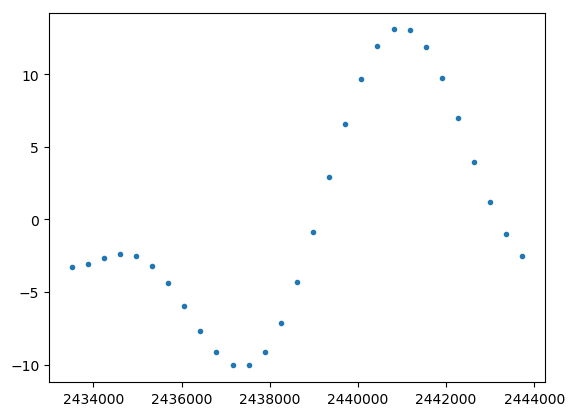

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13f5a05c0>

In [13]:
plot(time1,ttv1.*3600*24,".")

## Reference angle

In [ ]:
f = extract_data("OUTPUTS/moon_fitmtry2params.jld2")

In [ ]:
@load("mcmc_mtryresults.jld2")

In [ ]:
mu_1,P_1,t01,e1cosw1,e1sinw1,
mu_2,P_2,t02,e2cosw2,e2sinw2,
mu_3,P_3,t03,e3cosw3,e3sinw3,
tmaxsinphi0,tmaxcosphi0,deltaphi = f["pbest_global"]

In [ ]:
w1 = calc_deg(atan(e1sinw1,e1cosw1))
w2 = calc_deg(atan(e2sinw2,e2cosw2))
w3 = calc_deg(atan(e3sinw3,e3cosw3))
w1,w2,w3

In [ ]:
L_1 = calc_L(tt1,tt01,P_1,e1sinw1)
L_2 = calc_L(tt2,tt02,P_2,e2sinw2)
L_1,L_2

In [228]:
(((360/P1) .* (tt01 .- J2000)) .+ 181.97909950) 

49-element Array{Float64,1}:
 -27642.43014947823 
 -27282.430158204912
 -26922.43016693159 
 -26562.430175659018
 -26202.430184385696
 -25842.430193112374
 -25482.430201839055
 -25122.43021056648 
 -24762.43021929316 
 -24402.43022801984 
 -24042.43023674652 
 -23682.430245473945
 -23322.430254200626
      ⋮             
 -14322.430472371347
 -13962.430481098772
 -13602.430489825452
 -13242.430498552132
 -12882.430507278812
 -12522.430516006238
 -12162.430524732918
 -11802.430533459597
 -11442.430542186275
 -11082.430550913703
 -10722.430559640381
 -10362.430568367061

In [ ]:
((360/P_2) .* (tt02 .- J2000) .+ 100.46457166)

In [ ]:
[(360/P_3) .* (t03 .- J2000) .+ 34.39644051,
(360/P_3) .* (t03 .- J2000) .+ 34.39644051 + 360*1,
(360/P_3) .* (t03 .- J2000) .+ 34.39644051 + 360*2]

[Can't recall how i found this]

In [ ]:
77.56936298207381+w1,77.76976911511983+w2,77.91649744476126+w3

In [ ]:
xvalue = calc_deg.(atan.(vec(par_mcmc[:,iburn:nsteps,5]),vec(par_mcmc[:,iburn:nsteps,4]))) .+ 77.6
yvalue = calc_deg.(atan.(vec(par_mcmc[:,iburn:nsteps,10]),vec(par_mcmc[:,iburn:nsteps,9]))) .+ 77.8
optx = calc_deg(atan(e1sinw1,e1cosw1)) + 77.6
opty = calc_deg(atan(e2sinw2,e2cosw2)) + 77.8
truex = 131.601125535
truey = 102.78555318000001
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel(L"Longitude $\varpi$ of Venus [$deg$]")
ylabel(L"Longitude $\varpi$ of Earth [$deg$]")

In [ ]:
xvalue = calc_deg.(atan.(vec(par_mcmc[:,iburn:nsteps,15]),vec(par_mcmc[:,iburn:nsteps,14]))) .+ 77.9
yvalue = calc_deg.(atan.(vec(par_mcmc[:,iburn:nsteps,10]),vec(par_mcmc[:,iburn:nsteps,9]))) .+ 77.8
optx = calc_deg(atan(e3sinw3,e3cosw3)) + 77.9
opty = calc_deg(atan(e2sinw2,e2cosw2)) + 77.8
truex = 14.62221649
truey = 102.78555318000001
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel(L"Longitude $\varpi$ of Jupiter [$deg$]")
ylabel(L"Longitude $\varpi$ of Earth [$deg$]")

In [ ]:
(360/P_3 * (t03 - J2000) - 34.39644051)